<a href="https://colab.research.google.com/github/EduGame3/Experiment/blob/master/TAREA_1_RIESGO_DE_MERCADO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**TAREA 1, RIESGO DE MERCADO**

#**Acciones y Divisas** 

In [0]:
%load_ext rpy2.ipython
!rm -rf RiesgosFinancieros
!git clone "https://github.com/pikey-msc/RiesgosFinancieros/"

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
Cloning into 'RiesgosFinancieros'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 321 (delta 4), reused 0 (delta 0), pack-reused 311
Receiving objects: 100% (321/321), 1.47 MiB | 18.38 MiB/s, done.
Resolving deltas: 100% (187/187), done.


In [0]:
%%R
#require(quantmod)
install.packages("quantmod")
library(quantmod)
#require(data.table)
install.packages("data.table")
library(data.table)
#require("PerformanceAnalytics")
install.packages("PerformanceAnalytics")
library("PerformanceAnalytics")

install.packages("Deriv")
library(Deriv)


library(dplyr)
con = gzcon(url('https://github.com/systematicinvestor/SIT/raw/master/sit.gz', 'rb'))
source(con)
close(con)

/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: trying URL 'https://cran.rstudio.com/src/contrib/quantmod_0.4-16.tar.gz'

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Content type 'application/x-gzip'
  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  length 152106 bytes (148 KB)

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: =
  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6

In [0]:
%%R
#FUNCIÓN DE INTERPOLACIÓN ALAMBRADA

 #función de interpolación de tasas por el método alamabrada
talamb<-function(nodos,curva,plazos){
  n <-max(ncol(plazos),1)
  m <-max(ncol(nodos),1)
  TC=matrix(0,1,n)
  TL=matrix(0,1,n)
  TF=matrix(0,1,n)
  for (j in 1:n)
  {
    i=1
    repeat
    {
      if(nodos[i]<= plazos[j] && plazos[j] <=nodos[i+1])
      {
        TC[j]=curva[i]
        TL[j]=curva[i+1]
        TF[j]=((((1+TL[j]*nodos[i+1]/360)/(1+TC[j]*nodos[i]/360))^((plazos[j]-nodos[i])/(nodos[i+1]-nodos[i]))*(1+TC[j]*nodos[i]/360))-1)*360/plazos[j]
        break
      }
      else if (plazos[j]<nodos[1])
      {
        TC[j]=curva[1]
        TL[j]=curva[1]
        TF[j]=curva[1]
        break
      }
      else if (plazos[j]>nodos[m])
      {
        TC[j]=curva[m]
        TL[j]=curva[m]
        TF[j]=curva[m]
        break
      }
      else
      {i=i+1}
    }
  }
  as.matrix(t(as.numeric(rbind(TF))))
}


#funciones necesarias
diagv=function(x)			#función para diagonalizar un vector
{
  n01=nrow(as.matrix(x))
  m01=ncol(as.matrix(x))
  dimmax=max(n01,m01)
  res=matrix(0,dimmax,dimmax)
  for (i in 1:dimmax)
  {
    res[i,i]=x[i]
  }
  res
}

#interpolación
talamb=function(nodos,curva,plazos) #función de interpolación de tasas por el método alamabrada
{
  n=max(ncol(plazos),1)
  m=max(ncol(nodos),1)
  TC=matrix(0,1,n)
  TL=matrix(0,1,n)
  TF=matrix(0,1,n)
  for (j in 1:n)
  {
    i=1
    repeat
    {
      if(nodos[i]<= plazos[j] && plazos[j] <=nodos[i+1])
      {
        TC[j]=curva[i]
        TL[j]=curva[i+1]
        TF[j]=((((1+TL[j]*nodos[i+1]/360)/(1+TC[j]*nodos[i]/360))^((plazos[j]-nodos[i])/(nodos[i+1]-nodos[i]))*(1+TC[j]*nodos[i]/360))-1)*360/plazos[j]
        break
      }
      else if (plazos[j]<nodos[1])
      {
        TC[j]=curva[1]
        TL[j]=curva[1]
        TF[j]=curva[1]
        break
      }
      else if (plazos[j]>nodos[m])
      {
        TC[j]=curva[m]
        TL[j]=curva[m]
        TF[j]=curva[m]
        break
      }
      else
      {i=i+1}
    }
  }
  as.matrix(t(as.numeric(rbind(TF))))
}



##**Definición de parámetros:**
### 1.a) 1000 acciones de GCarso, -5000 de America Móvil y 1200 WalMart. 
### 1.b) 1500 dólares (peso dólar), 700 euros, y -600 libras esterlinas.

In [0]:
%%R
fval=as.Date("20200228",format="%Y%m%d") #Fecha de valoración
itpl=0 #poner 0 si se quiere interpolación lineal o 1 si se quiere tasa alambrada
alpha=0.98 #Nivel de confianza para obtener estimaciones de riesgo
#setwd(direc)	

#ACCIONES Y DIVISAS
#Cargar los símbolos de yahoo finance para EQ
Symbols<-c  ("AMXL.MX","GCARSOA1.MX", "WMT.MX" )#tienen que ir en orden alfabético
pos_eq=c(-5000,1000,1200) #monto inicial invertido en acciones
#Cargar los símbolos de yahoo finance para FX
SymbolsFX<-c("EURUSD=X","GBPUSD=X","USDMXN=X" ) #tienen que ir en orden alfabético
pos_fx=c(700,-600,1500) #monto inicial invertido en divisas
nh=3660 #días de historia

## **Carga de datos**

In [0]:
%%R
#   CARGA DE DATOS DE ACCIONES
pos=cbind(t(pos_fx),t(pos_eq)) #cuanto compré de cada activo
start_date=Sys.Date()-nh #fecha inicial     [los valores de toman 3660 dias atrás de la fecha de la compu, o llegan hasta el 28 de feb???]
#   Creación del objeto para guardar los datos
dataEnv<-new.env()
dataEnvFX<-new.env()
#   obtener los datos
getSymbols.yahoo(Symbols,env=dataEnv,from=start_date)
getSymbols.yahoo(SymbolsFX,env=dataEnvFX,from=start_date)
#   muestra
#print(tail(dataEnvFX$`GBPUSD=X`))
#   limpiarlos, alinearnos y quedarnos con el precio de cierre 
bt.prep(dataEnv,align='remove.na',fill.gaps = T)
bt.prep(dataEnvFX,align='remove.na',fill.gaps=T)
#   muestra de datos
#print(tail(dataEnv$prices))
#head(dataEnvFX$prices)
#   Nos quedamos con los precios (ya los teníamos)
stock_prices = dataEnv$prices #acciones
#print(tail(stock_prices[,]))
stock_pricesFX=dataEnvFX$prices #divisas
#print(tail(stock_pricesFX))
#   cambiar todo a pesos mexicanos
stock_pricesFX=cbind(stock_pricesFX[,1,with=F]*stock_pricesFX[,3,with=F],stock_pricesFX[,2,with=F]*stock_pricesFX[,3,with=F],stock_pricesFX[,3,with=F])
#print(tail(stock_pricesFX)) #divisas
stock_prices_EQFX=merge(stock_pricesFX,stock_prices,join = "inner")
#print(head(stock_prices_EQFX)) #divisas y acciones
#print(tail(stock_prices_EQFX))
#   Preciso actuales
#Preciso actuales
#x0=as.data.table(as.matrix(stock_prices_EQFX[nrow(stock_prices_EQFX),])) #valores actuales
x0=stock_prices_EQFX[nrow(stock_prices_EQFX),]
print(x0)
print(tail(stock_prices_EQFX))

           EURUSD.X GBPUSD.X USDMXN.X AMXL.MX GCARSOA1.MX WMT.MX
2020-03-18 25.29229 27.83204  22.9606   15.32       54.85   2863
           EURUSD.X GBPUSD.X USDMXN.X AMXL.MX GCARSOA1.MX  WMT.MX
2020-03-10 23.72166 27.21260  20.8122   15.07       55.08 2434.00
2020-03-11 23.52635 26.83853  20.7894   15.33       51.77 2428.00
2020-03-12 24.11835 27.45225  21.4166   14.11       48.98 2277.77
2020-03-13 24.57016 27.61330  21.9672   14.70       49.80 2380.00
2020-03-17 25.22997 27.72381  22.6010   15.26       55.87 2736.00
2020-03-18 25.29229 27.83204  22.9606   15.32       54.85 2863.00


Paso 1: generación de rendimientos

In [0]:
%%R
stock_returns = Return.calculate(stock_prices_EQFX, method = c("continuous"))
#head(stock_returns[,1:3])
#print(head(stock_returns))

#CONFIRMACIÓN
DeltaX=as.matrix(log(as.matrix(stock_prices_EQFX[2:nrow(stock_prices_EQFX)])/as.data.table(as.matrix(stock_prices_EQFX[1:(nrow(stock_prices_EQFX)-1)]))))
#tail(DeltaX)
head(DeltaX)

         EURUSD.X      GBPUSD.X      USDMXN.X      AMXL.MX  GCARSOA1.MX
[1,] -0.000250565  0.0012022077 -0.0001677725 0.0142315822 -0.003681814
[2,] -0.007316494  0.0001987766 -0.0051025219 0.0065509569  0.005413929
[3,] -0.004152015  0.0007394573  0.0049427124 0.0065083211 -0.001515436
[4,] -0.001893598 -0.0117933451  0.0037806324 0.0006485085  0.011181166
[5,] -0.001254463  0.0025025602 -0.0034770161 0.0032362488  0.025329220
[6,] -0.009878459 -0.0083061818 -0.0025516442 0.0051563118  0.022054804
           WMT.MX
[1,]  0.037844148
[2,]  0.000000000
[3,]  0.000000000
[4,] -0.011641775
[5,]  0.000000000
[6,]  0.002869442


Gráfica

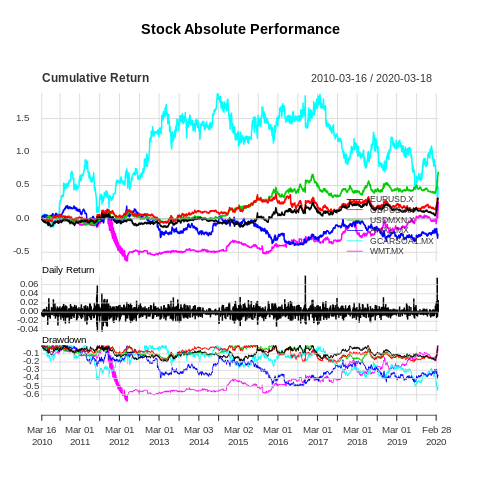

In [0]:
%%R
charts.PerformanceSummary(stock_returns,main='Stock Absolute Performance',legend.loc="bottomright")

In [0]:
%%R
n=nrow(DeltaX)
n
m=ncol(DeltaX)
m


V0=x0*pos #Valor del portafolio
#print(V0)
VT=sum(V0)
#print(sum(V0))
#Cálculo de Distribución de Pérdidas y Ganancias
X_ast<-matrix(0,n,m) #matriz de simulacion de precios
Y_ast<-matrix(0,n,m) #matriz de simulacion de instrumentos financieros
PL<-matrix(0,n,m) 
PLTdCAcc<-matrix(0,n,2) #POR FACTOR DE RIESGO
PLT=matrix(0,n,1) #TOTAL
for (i in (1:n))
{
  X_ast[i,]=x0*exp(DeltaX[i,]) #Simulación del precio
  Y_ast[i,]=X_ast[i,]*pos
  PL[i,]=Y_ast[i,]-V0  #Pérdidas y ganancias por posición
  PLTdCAcc[i,]=c(sum(PL[i,1:(len(pos_fx))]),sum(PL[i,(len(pos_fx)+1):(len(pos_eq)+len(pos_fx))])) #Pérdidas y ganancias por factor de riesgo
  PLT[i]=sum(PL[i,]) #Pérdidas y ganancias totales
}
#print(PL[1:10,])
#print(PLTdCAcc[1:10,])
#print(PLT[1:10,])
#print(PLT[1:10,])
print(class(V0))

[1] "xts" "zoo"


##**VaR por posición sin alisado.**

In [0]:
%%R
#VaR por posición sin alisado
VaRCont=matrix(0,1,m)
CVaRCont=matrix(0,1,m)
alpha=0.95


for (i in (1:m))
{
VaRCont[i]=quantile(PL[,i],1-alpha,n)
CVaRCont[i]= mean(PL[which(PL[,i]<VaRCont[i]),i])
}

#Resumen medidas de riesgo por posición
VaRCont=as.data.table(VaRCont)
CVaRCont=as.data.table(CVaRCont)

#valores absolutos con respecto al portafolio sin alisado
names(VaRCont)=names(x0)
names(CVaRCont)=names(x0)
#print('valores absolutos con respecto al portafolio sin alisado')
#print("VaR")
#print(VaRCont/abs(as.matrix(V0)))
#print('CVaR')
#print(CVaRCont/abs(as.matrix(V0)))


#medias de riesgo por factor de riesgo acciones y divisas

VaRfr=matrix(0,1,2)
CVaRfr=matrix(0,1,2)

for (i in (1:2))
{
  VaRfr[i]=quantile(PLTdCAcc[,i],1-alpha,n)
  CVaRfr[i]= mean(PLTdCAcc[which(PLTdCAcc[,i]<VaRfr[i]),i])
}



VaRfr=as.data.table(VaRfr)
CVaRfr=as.data.table(CVaRfr)
#print('')
#print('medias de riesgo por factor de riesgo acciones y divisas')
print(VaRfr)
print(CVaRfr)

names(VaRfr)=c("divisas", "acciones")
names(CVaRfr)=c("divisas", "acciones")
#VALORES ABSOLUTOS
VaRfr/c(abs(as.matrix(sum(V0[,1:(len(pos_fx)+1)]))),abs(as.matrix(sum(V0[,(len(pos_fx)+1):(len(pos_eq)+len(pos_fx))]))))
CVaRfr/c(abs(as.matrix(sum(V0[,1:(len(pos_fx)+1)]))),abs(as.matrix(sum(V0[,(len(pos_fx)+1):(len(pos_eq)+len(pos_fx))]))))


#hist(as.matrix(PL[,3]))
#hist(as.matrix(PL[,2]))


#VaR Total
VaRTotal=quantile(PLT,1-alpha,n)
CVaRTotal= mean(PLT[which(PLT<VaRTotal),])

#VALOR ABSOLUTOS
#print('VaR Total')
#print(VaRTotal)
#print(VaRTotal/sum(V0))
#print('CVaR Total')
#print(CVaRTotal)
#print(CVaRTotal/sum(V0))
print(VaRCont)
print(CVaRCont)

          V1        V2
1: -418.6353 -74117.65
          V1      V2
1: -586.3544 -214713
    EURUSD.X  GBPUSD.X  USDMXN.X   AMXL.MX GCARSOA1.MX    WMT.MX
1: -258.4515 -235.0441 -382.3951 -1805.043   -1672.527 -73597.78
   EURUSD.X  GBPUSD.X  USDMXN.X   AMXL.MX GCARSOA1.MX    WMT.MX
1: -348.861 -339.1339 -536.6855 -2545.851   -2399.763 -214786.7


Observamos que para V2 (acciones) tenemos un CVaR que casi triplica el VaR, con eso podemos decir que tenemos una cola pesada, i.e. datos que superan por mucho el valor en riego, en cambio para V1 (divisas) el CVaR no aumenta mucho comparado con el VaR y es natural pues en los datos históricos se encuentran pocos (comparados con los que se tomaron) datos que muestren un escenario de tensión.


##**VaR por posición con alisado**

In [0]:
%%R
#Medidas de riesgo CON alisado

#Se necesita definir
#1) El valor del peso inicial del primer escenario "w0"
#2) La función de cuantil con vector de probabilidades no iguales
#3) La función de CVaR con probabilidades no iguales

#w0=0.05

#Creación de dos funciones que sirven para este fin
# Percentil con pesos de probabilidades
# 
# v  un vector de observaciones
# w Un vector numérico de valores positivos, en general es la distrubición.
# p  el valor de la probabilidad entre 0 y 1.
# 
# Esta función no interpola

w0<-0.05

wquantile <- function(v,w=rep(1,length(v)),p=.5) 
{ 
  if ( !is.numeric(w) || length(v) != length(w) ) 
    stop("Los valores y los pesos tienen que tener misma longitud") 
  if ( !is.numeric(p) || any( p<0 | p>1) ) 
    stop("Percentil tiene que ser 0<=p<=1") 
  if ( min(w) < 0 ) stop("Los pesos tiene que ser mayores que 0") 
  ranking <- order(v) 
  sumw <- cumsum(w[ranking]) 
  plist <- sumw / sumw[ length(sumw) ] 
  v [ ranking [ which.max( plist >= p ) ] ]  
} 

#CVaR con alisado
wcvar <- function(v,w=rep(1,length(v)),p=.5) 
{ 
  if ( !is.numeric(w) || length(v) != length(w) ) 
    stop("Los valores y los pesos tienen que tener misma longitud") 
  if ( !is.numeric(p) || any( p<0 | p>1) ) 
    stop("Percentil tiene que ser 0<=p<=1") 
  if ( min(w) < 0 ) stop("Los pesos tiene que ser mayores que 0") 
  ranking <- order(v) 
  sumw <- cumsum(w[ranking]) 
  plist <- sumw / sumw[ length(sumw) ] 
  loss= v [ ranking [ which( plist < p ) ] ]  
  esc=w [ ranking [ which( plist < p ) ] ]  
  sum(loss*esc)/(sum(esc))
} 


#esc_cvar=which(cumsum(p_esc[order(PLT[,1])])<pdca)


#p_esc[esc_cvar]

#tshs=cbind(PLT,p_esc)


In [0]:
%%R
lambda =uniroot(function(x) w0*(1-x^(n))/(1-x)-1, c(0,0.99), tol = 1e-28)$root
lambda

#generamos la función que genera "n" escenarios con base en w0 y lambda
genera_esc=function(lamda,w0,n)
{
  p_esc=matrix(0,n,1)
  for (i in (1:n))
  {
    p_esc[i]=w0*lambda^(i-1)
  }
  p_esc
}

p_esc=genera_esc(lambda,w0,n)
t(p_esc[1:10])
sum(p_esc) #validamos que sume 1

#Creamos las cajas de VaR y CVaR con alisado
VaRca=matrix(0,1,ncol(PL))
CVaRca=matrix(0,1,ncol(PL))

#IMPORTANTE: VALIDAR QUE SE TENGA EL MISMO ORDEN DE ESCENARIOS, ES POR ESO QUE METEMOS P_ESC[ORDER(P_ESC)]
for (j in (1:m))
{
  VaRca[j]=wquantile(as.matrix(PL[,j]), p_esc[order(p_esc)], 1-alpha)
  CVaRca[j]=wcvar(as.matrix(PL[,j]), as.matrix(p_esc[order(p_esc)]), 1-alpha)
}

#Resumen medidas de riesgo por posición
VaRca=as.data.table(VaRca)
CVaRca=as.data.table(CVaRca)

#valores absolutos con respecto al portafolio sin alisado
names(VaRca)=names(x0)
names(CVaRca)=names(x0)
VaRca/abs(as.matrix(V0))
CVaRca/abs(as.matrix(V0))


#medias de riesgo por factor de riesgo acciones y divisas

VaRfrca=matrix(0,1,2)
CVaRfrca=matrix(0,1,2)


for (j in (1:2))
{
  VaRfrca[j]=wquantile(as.matrix(PLTdCAcc[,j]), p_esc[order(p_esc)], 1-alpha)
  CVaRfrca[j]= wcvar(as.matrix(PLTdCAcc[,j]), as.matrix(p_esc[order(p_esc)]), 1-alpha)
}



VaRfrca=as.data.table(VaRfrca)
CVaRfrca=as.data.table(CVaRfrca)

names(VaRfrca)=c("divisas", "acciones")
names(CVaRfrca)=c("divisas", "acciones")
#VALORES ABSOLUTOS
VaRfrca/c(abs(as.matrix(sum(V0[,1:(len(pos_fx)+1)]))),abs(as.matrix(sum(V0[,(len(pos_fx)+1):(len(pos_eq)+len(pos_fx))]))))
CVaRfrca/c(abs(as.matrix(sum(V0[,1:(len(pos_fx)+1)]))),abs(as.matrix(sum(V0[,(len(pos_fx)+1):(len(pos_eq)+len(pos_fx))]))))


VaRcaT=wquantile(as.matrix(PLT), p_esc[order(p_esc)], 1-alpha)
CVaRcaT=wcvar(as.matrix(PLT), p_esc[order(p_esc)], 1-alpha)


V0
VaRCont/abs(as.matrix(V0))
VaRca/abs(as.matrix(V0))
CVaRCont/abs(as.matrix(V0))
CVaRca/abs(as.matrix(V0))


c(sum(V0[,1:3]),sum(V0[,4:5]))
VaRfr/c(abs(as.matrix(sum(V0[,1:3]))),abs(as.matrix(sum(V0[,4:5]))))
VaRfrca/c(abs(as.matrix(sum(V0[,1:3]))),abs(as.matrix(sum(V0[,4:5]))))
CVaRfr/c(abs(as.matrix(sum(V0[,1:3]))),abs(as.matrix(sum(V0[,4:5]))))
CVaRfrca/c(abs(as.matrix(sum(V0[,1:3]))),abs(as.matrix(sum(V0[,4:5]))))


sum(V0)
print('VaR')
print(VaRTotal/abs(sum(V0)))
print(VaRcaT/abs(sum(V0)))
print('CVaR')
print(CVaRTotal/abs(sum(V0)))
print(CVaRcaT/abs(sum(V0)))

[1] "VaR"
         5% 
-0.02142841 
[1] -0.0357848
[1] "CVaR"
[1] -0.06226436
[1] -0.06039824


Observamos que aunque hay una gran diferencia en proporción con el VaR sin alisado, la distancia entre VaR y CVaR puede considerarse grande pero noo tanto como en el caso anterior, pero aun así el valor casi se duplica.

# **Bonos**

In [0]:
%load_ext rpy2.ipython
!rm -rf RiesgosFinancieros
!git clone "https://github.com/pikey-msc/RiesgosFinancieros/"


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
Cloning into 'RiesgosFinancieros'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 321 (delta 4), reused 0 (delta 0), pack-reused 311
Receiving objects: 100% (321/321), 1.47 MiB | 18.16 MiB/s, done.
Resolving deltas: 100% (187/187), done.


# Definición de parámetros para valorar:
BONOS CETE
BONOS M
BONDES D

Cargamos parámetros para valoración:

In [0]:
%%R
fval=as.Date("20200228",format="%Y%m%d") #Fecha de valoración
itpl=0 #poner 0 si se quiere interpolación lineal o 1 si se quiere tasa alambrada
alpha=0.98 #Nivel de confianza para obtener estimaciones de riesgo
#setwd(direc)	


#CETES
base="RiesgosFinancieros/2020-2/Insumos/tasa_guber.txt"
plazos_bcc=cbind( 180)
contratos_bcc=cbind(-1500)
nominal_bcc=10 #CETE

#BONOS M
btasadesc_bm="RiesgosFinancieros/2020-2/Insumos/tasa_yield.txt"
tfcupon_bm=cbind( 0.065) #Tasafija del cupón
plazos_bm=cbind( 3600) #Vencimiento del bono
plazocupon_bm=cbind( 182) #plazos_bm fijos de cada cupón
contratos_bm=cbind(-10000) #posición invertida
nominal_bm=100

#BONDES D
btasadescst="RiesgosFinancieros/2020-2/Insumos/tasa_guber_st.txt"
btasafondeo="RiesgosFinancieros/2020-2/Insumos/tfondeo.txt"
plazos_bdm=cbind( 707) #Vencimiento del bono
plazocupon_bdm=cbind( 28) #plazos_bdm fijos de cada cupón
contratos_bdm=cbind(10000) #posición invertida
nominal_bdm=100





# Carga de datos

In [0]:
%%R
#LEER DATOS DE CETES #CARGA DE DATOS DE BONO CUPÓN CERO
data<-read.table(base)
n<-nrow(data)
m_gov=ncol(data)
#x_orig_gov=data.frame(data[2:n,1:m_gov])
x_orig_gov=data.table(mutate(data[2:n,1:m_gov],Date=as.Date(V1,format="%Y%m%d")))
x_orig_gov=x_orig_gov%>%select(-V1)
nodos_gov=data.frame(data[1,2:m_gov])

#LEER DATOS DE BONOS M
#carga de datos
#carga de tasas de descuento
data1<-read.table(btasadesc_bm)
n<-nrow(data1)
m_tybm=ncol(data1)
X_orig_tybm=as.data.table(mutate(data1[2:n,1:m_tybm],Date=as.Date(V1,format="%Y%m%d")))
X_orig_tybm=X_orig_tybm%>%select(-V1)
nodos_tybm=data.frame(data1[1,2:m_tybm])


##CARGA DE DATOS DE BONDE D
#carga de datos
#carga de tasas de descuento
data1<-read.table(base)
n<-nrow(data1)
m_bd=ncol(data1)
##X_orig_bd=as.data.table(mutate(data1[2:n,1:m_tybm],Date=as.Date(V1,format="%Y%m%d")))
#X_orig_bd%>%select(-V1)

X1_orig=mutate(data.frame(data1[2:n,1:m_bd]), V1=as.Date(V1,format="%Y%m%d"))
#nodos=data.frame(data1[1,2:m_bd])
n=n-1

data3<-read.table(btasadescst)
n3<-nrow(data3)
m3_bd=ncol(data3)
X3_orig_bd=as.data.table(mutate(data3[2:n,1:m3_bd],Date=as.Date(V1,format="%Y%m%d")))
X3_orig_bd=X3_orig_bd%>%select(-V1)

X3a_orig=mutate(data.frame(data1[2:n,1:m_bd]), V1=as.Date(V1,format="%Y%m%d"))
nodos3_bd=data.frame(data3[1,2:m3_bd])
n3=n3-1

data2<-read.table(btasafondeo)
n2<-nrow(data2)
X2_orig_bd=data.frame(data2[2:n2,1:2])
X2_orig_bd=mutate(X2_orig_bd, V1=as.Date(V1,format="%Y%m%d"), Date=as.Date(V1,format="%Y%m%d"), V2=as.numeric(as.character(V2)))
tfh=seq(min(X2_orig_bd$V1), max(X2_orig_bd$V1), "days") #sucesión de dias para tasa fondeo
tfhd=data.frame(ID=1:count(tfh),fecha=tfh)

#Cruzar la sucesión de todos los días versus el de tasa de fondeo
tfhd=setDT(tfhd)[, Date := tfh][order(-Date)]
X2_orig_bd=setDT(X2_orig_bd)[, Date := V1][order(-Date)]
# rolling join unión por rolling, rellena las fechas que faltaban con el último valor conocido "roll=Inf"
X2_orig_bd=X2_orig_bd[tfhd, on = .(Date), roll = Inf] 
#buscar fecha de valuación en tfondeo
tf_act=X2_orig_bd[fecha==fval,]$V2/100
tf_int=X2_orig_bd[fecha<=fval & fecha>=(fval-plazocupon_bdm[1])]$V2/100

X1_orig=setDT(X1_orig)[, Date:= V1][order(-Date)] #Para alinear con valor presente y tasa de fondeo.


# Integración de Insumos

Aseguramiento de que todos los factores de riesgo estén alineados en sus fechas, nos quedamos con la intersección. Posteriormente, filtramos cada histórico factor de riesgo hacia esta intersección de todos.

In [0]:
%%R
#INTERSECCIÓN DE FECHAS DE TODOS LOS INSUMOS    
  
#head(x_orig_gov)  
lin_gub=data.table(Date=as.Date(X_orig_tybm[x_orig_gov,on=.(Date),nomatch=0]$Date)) #yield y guber
lin_gub_bmy=data.table(Date=as.Date(lin_gub[X3_orig_bd,on=.(Date),nomatch=0]$Date)) #guber y bonos M con,st (bonde)
print(lin_gub_bmy)
#print(lin_gub)

           Date
  1: 2020-03-06
  2: 2020-03-05
  3: 2020-03-04
  4: 2020-03-03
  5: 2020-03-02
 ---           
268: 2019-03-20
269: 2019-03-19
270: 2019-03-18
271: 2019-03-17
272: 2019-03-14


In [0]:
%%R
n=nrow(lin_gub_bmy) #Historia de todos


#historia de curva gubernamental
x_orig_gov=lin_gub_bmy[x_orig_gov,on=.(Date),nomatch=0][order(-Date)]
x_orig_gov=x_orig_gov%>%select(-Date)

#historia de curva yield
X_orig_tybm=lin_gub_bmy[X_orig_tybm,on=.(Date),nomatch=0][order(-Date)]
X_orig_tybm=X_orig_tybm%>%select(-Date)


#Historia de curvas de bonde
#CONSIDERAR LA CURVA GUBERNAMENTAL X1_ORIG_GOV
X3_orig_bd=lin_gub_bmy[X3_orig_bd,on=.(Date),nomatch=0][order(-Date)]
X3_orig_bd=X3_orig_bd%>%select(-Date)

#print(x_orig_gov)


# Pasos para medir el riesgo por el método de Simulación Histórica

Para todos los instrumentos hay que definir y calcular los siguientes elementos:\
1.Historico de factores de riesgo\
2.Vector de precios actual\
3.Valoración al día actual

##BONO M 



In [0]:
%%R
#BONO M  CÁLCULO
#Posición inicial
#interpolación de tasas y volatilidades
m=ncol(plazos_bm)
X_bm=matrix(0,n,m)
for (i in 1:(n))
{
  X_bm[i,]=if(itpl==0){approx(nodos_tybm,X_orig_tybm[i,],plazos_bm,rule=2)$y}else{talamb(nodos_tybm,X_orig_tybm[i,],plazos_bm)}
}



#Función de valoración por tasa yield
bonoMyield=function(x, plazos_bm, plazocupon_bm, tfcupon_bm, nominal_bm, contratos_bm) #valoración bono tasa fija
{
  N=as.integer(plazos_bm/plazocupon_bm)+1   
  a=(1-(1+x*plazocupon_bm/360)^(-N))/(plazocupon_bm*x/360)
  p1=plazos_bm-plazocupon_bm*(N-1)   
  ((contratos_bm*nominal_bm*tfcupon_bm*plazocupon_bm/360)*a+(contratos_bm*nominal_bm)/((1+x*plazocupon_bm/360)^N))*(1+x*plazocupon_bm/360)^(1-p1/plazocupon_bm)   
}

x0_bm=t(as.matrix(X_bm[1,])) #tasas de descuento valor actual
V0_bm=bonoMyield(x0_bm,plazos_bm, plazocupon_bm, tfcupon_bm, nominal_bm, contratos_bm)
V0_bm

          [,1]
[1,] -931308.5


## Bondes D

In [0]:
%%R
#BONDE D CÁLCULO

X2_pr=lin_gub[X2_orig_bd, on = .(Date),nomatch=0][order(-Date)] #Se alinea la tasa de fondeo por fecha con la tasa de valor presente.
m=ncol(plazos_bdm)


N_bd=as.integer(plazos_bdm/plazocupon_bdm)+1 #número de cupones a pagar
VTplazos_bdm=matrix(0,1,sum(N_bd)) #vector de todos los plazos_bdm de todos los contratos_bdm
contratos_bdmT=matrix(0,1,sum(N_bd)) #vector de todos los contratos_bdm de todos los flujos de todos los contratos_bdm
nominal_bdmT=matrix(0,1,sum(N_bd)) #vector de todos los nominal_bdmes de todos los flujos de todos los contratos_bdm
plazocupon_bdmT=matrix(0,1,sum(N_bd)) #vector de todos los plazos_bdmcupon de todos los flujos de todos los contratos_bdm
tasafijaT_bd=matrix(0,1,sum(N_bd)) #vector de tasas fijas de todos los flujos de todos los contratos_bdm
ulNomT_bd=matrix(0,1,sum(N_bd)) #vector de contratos_bdm a final de flujo


plazini_bd=plazos_bdm-plazocupon_bdm*(N_bd-1) #vector de plazos_bdm iniciales
ddv=plazocupon_bdm-plazini_bd #dias trasncurridos del cupón vigente
tfcupon=matrix(0,1,m)  #El primero cupón de cada bono
tfcupondev=matrix(0,1,m) #cupón de los días devengados
tfcupgen=((1+tf_act/360)^(plazocupon_bdm[1])-1)*360/plazocupon_bdm[1] #el segundo al último cupón de todos los bonos
#calcula cupones de bonos
for (j in (1:m))
{
  tfcupondev[j]=(prod(1+tf_int[(1:ddv[j])]/360)-1)*360/ddv[j]
  tfcupon[j]=((1+tfcupondev[j]*ddv[j]/360)*(1+tf_act/360)^(plazocupon_bdm[1]-ddv[j])-1)*360/plazocupon_bdm[1]
}


for (j in (1:m))
{
  if (j==1)
  {
    VTplazos_bdm[,1:sum(N_bd[1:j])]=seq(plazini_bd[j],plazos_bdm[j], by=plazocupon_bdm[j])
    contratos_bdmT[,1:sum(N_bd[1:j])]=seq(contratos_bdm[j],contratos_bdm[j])
    plazocupon_bdmT[,1:sum(N_bd[1:j])]=seq(plazocupon_bdm[j],plazocupon_bdm[j])
    ulNomT_bd[,sum(N_bd[1:j])]=contratos_bdm[j]
    tasafijaT_bd[,1]=tfcupon[j]
    tasafijaT_bd[,2:sum(N_bd[1:j])]=seq(tfcupgen,tfcupgen)
  }
  else
  {
    VTplazos_bdm[,(sum(N_bd[1:j-1])+1):sum(N_bd[1:j])]=seq(plazini_bd[j],plazos_bdm[j], by=plazocupon_bdm[j])
    contratos_bdmT[,(sum(N_bd[1:j-1])+1):sum(N_bd[1:j])]=seq(contratos_bdm[j],contratos_bdm[j])					
    plazocupon_bdmT[,(sum(N_bd[1:j-1])+1):sum(N_bd[1:j])]=seq(plazocupon_bdm[j],plazocupon_bdm[j])
    tasafijaT_bd[,(sum(N_bd[1:j-1])+1)]=tfcupon[j]
    tasafijaT_bd[,(sum(N_bd[1:j-1])+2):sum(N_bd[1:j])]=seq(tfcupgen,tfcupgen)
    ulNomT_bd[,sum(N_bd[1:j])]=contratos_bdm[j]
  }
}

Xvp_bd=matrix(0,n,ncol(VTplazos_bdm))
Xst_bd=matrix(0,n,ncol(VTplazos_bdm))

for (i in (1:n))
{
  Xvp_bd[i,]=if(itpl==0){approx(nodos_gov,x_orig_gov[i,],VTplazos_bdm,rule=2)$y}else{talamb(nodos_gov,x_orig_gov[i,],VTplazos_bdm)}
  Xst_bd[i,]=if(itpl==0){approx(nodos3_bd,X3_orig_bd[i,],VTplazos_bdm,rule=2)$y}else{talamb(nodos3_bd,X3_orig_bd[i,],VTplazos_bdm)}
  
}

X_bd_tc=matrix(1,n,ncol(contratos_bdmT))*X2_pr$V2/100
X_bd_ext=cbind(X_bd_tc,as.matrix(Xvp_bd),as.matrix(Xst_bd))

bondeD=function(contratos_bdmT,  nominal_bdm, tf_act, plazocupon_bdmT, VTplazos_bdm, Xvp, Xst, N,ddv)
{
  tfcupon=matrix(0,1,m)  #El primero cupón de cada bono
  tfcupondev=matrix(0,1,m) #cupón de los días devengados
  tfcupgen=((1+tf_act/360)^(plazocupon_bdm[1])-1)*360/plazocupon_bdm[1] #el segundo al último cupón de todos los bonos
  tasafijaT=matrix(0,1,sum(N))
  #calcula cupones de bonos
  for (j in (1:m))
  {
    tfcupondev[j]=(prod(1+tf_int[(1:ddv[j])]/360)-1)*360/ddv[j]
    tfcupon[j]=((1+tfcupondev[j]*ddv[j]/360)*(1+tf_act/360)^(plazocupon_bdm[1]-ddv[j])-1)*360/plazocupon_bdm[1]
  }
  
  
  for (j in (1:m))
  {
    if (j==1)
    {
      tasafijaT[,1]=tfcupon[j]
      tasafijaT[,2:sum(N[1:j])]=seq(tfcupgen,tfcupgen)
    }
    else
    {
      tasafijaT[,(sum(N[1:j-1])+1)]=tfcupon[j]
      tasafijaT[,(sum(N[1:j-1])+2):sum(N[1:j])]=seq(tfcupgen,tfcupgen)
    }
  }
  
  
  V0=matrix(0,1,count(N))
  V0f=((((contratos_bdmT*(tasafijaT)*(plazocupon_bdmT/360))+ulNomT_bd)/(1+(Xvp+Xst)*VTplazos_bdm/360)))*nominal_bdm
  for (j in (1:count(N)))
  {
    if(j==1)
    {
      V0[j]=sum(V0f[j:N[j]])
    }
    else
    {
      V0[j]=sum(V0f[(sum(N[1:j-1])+1):(sum(N[1:j]))])
    }
  }
  V0
} 



V0_bd=bondeD(contratos_bdmT, nominal_bdm, tf_act, plazocupon_bdmT, VTplazos_bdm, Xvp_bd[1,], Xst_bd[1,], N_bd,ddv)
V0_bd

         [,1]
[1,] 952635.9


## CETES

In [0]:
%%R

#CETE CÁLCULO
#paso para interpolar las tasas
m=ncol(plazos_bcc)
x_bcc=matrix(0,n,m)
for (i in 1:(n))
{
  #x[i,]=approx(nodos_gov,x_orig_gov[i,],plazos_bcc)$y
  x_bcc[i,]=if(itpl==0){approx(nodos_gov,x_orig_gov[i,],plazos_bcc,rule=2)$y}else{talamb(nodos_gov,x_orig_gov[i,],plazos_bcc)}
}

x0_bcc=x_bcc[1,]

#función
bonocupcero = function(i,t)
{
  1/(1+i*t/360)
}

V0_bcc=as.matrix(bonocupcero(x0_bcc,plazos_bcc))*contratos_bcc*nominal_bcc #Valor actual de cada bono

VT0_bcc=sum(V0_bcc) #Valor total del portafolio al tiempo 0
VT0_bcc

[1] -14423.89


# Integración de factores y cálculo de riesgo en conjunto, y aplicación de simulación

In [0]:
%%R
#DIMENSION DE TODOS LOS INSTRUMENTOS
#Son 3 instrumentos financieros 
n_if=matrix(0,3,1)
n_if[1]=ncol(x_bcc) #cetes
n_if[2]=ncol(X_bd_ext) #bonde
n_if[3]=ncol(X_bm) #bonos m

print(ncol(X_bd_ext))
#valor del portafolios

V0_port=cbind(V0_bcc, V0_bd,V0_bm)
V0T_port=sum(V0_port)



#INTEGRACIÓN DE TODOS LOS FACTORES DE RIESGO EN UNA MATRIZ
X_port=cbind(x_bcc,X_bd_ext,X_bm) #Factores de riesgo del portafolios de 8(9) instrumentos financieros

#Cálculo de variaciones Delta_X DEL PORTAFOLIOS


#Me parece que el error se corrige con esto, sustitye esta línea:
#DeltaX_port=as.matrix(log(X_port[1:(n-1)]/X_port[2:(n)]))
#por
#DeltaX_port=as.matrix(log(X_port[1:(n-1),]/X_port[2:(n),]))

DeltaX_port=as.matrix(log(X_port[1:(n-1),]/X_port[2:(n),]))  #************************************************
DeltaX_port[is.nan(DeltaX_port)] <- 0 #quitamos NaN
DeltaX_port[is.na(DeltaX_port)] <- 0 #quitamos Na
DeltaX_port[is.infinite(DeltaX_port)] <- 0 #quitamos Na


Ns=nrow(DeltaX_port) #Definimos número de escenarios históricos
#alpha=0.98 #Nivel de Confianza para las medidas de riesgo

DeltaX_s=DeltaX_port
#print(head(DeltaX_s))
print(ncol(DeltaX_s))
#print(V0T_port)

[1] 78
[1] 80


# Medición de Riesgo

## Riesgo de Bondes D

In [0]:
%%R

#Cálculo de matriz de pérdidas y ganancias BONDES
#dimensión
m=count(N_bd)    #PASO CLAVE
X_s_bd=matrix(0,Ns,n_if[2]) #Factores de riesgo simulados con base en DeltaX_s x0*(1+Delta_Xs)   #PASO CLAVE
V_bd=matrix(0,Ns,m)
Vfr1_bd=matrix(0,Ns,m)
Vfr2_bd=matrix(0,Ns,m)
Vfr3_bd=matrix(0,Ns,m)
PG_bd=matrix(0,Ns,m) #Pèrdidas y ganancias
PGfr1_bd=matrix(0,Ns,m)
PGfr2_bd=matrix(0,Ns,m)
PGfr3_bd=matrix(0,Ns,m)
PGT_bd=matrix(0,Ns,1)
PGfr1T_bd=matrix(0,Ns,1)
PGfr2T_bd=matrix(0,Ns,1)
PGfr3T_bd=matrix(0,Ns,1)

DeltaX_s_bd=DeltaX_s[,sum(n_if[1:2],1):sum(n_if[2:3])]    #PASO CLAVE
x0_bd=X_bd_ext[1,]    #PASO CLAVE

for (i in 1:Ns)
{
  X_s_bd[i,]=x0_bd*(1+DeltaX_s_bd[i,])
  #PASO CLAVE
  V_bd[i,]=bondeD(contratos_bdmT, nominal_bdm, X_s_bd[i,1], plazocupon_bdmT, VTplazos_bdm, X_s_bd[i,(n_if[2]/3+1):(n_if[2]*2/3)], X_s_bd[i,(n_if[2]*2/3+1):(n_if[2])], N_bd,ddv)
  #PASO CLAVE
  Vfr1_bd[i,]=bondeD(contratos_bdmT, nominal_bdm, X_s_bd[i,1], plazocupon_bdmT, VTplazos_bdm, x0_bd[(n_if[2]/3+1):(n_if[2]*2/3)], x0_bd[(n_if[2]*2/3+1):(n_if[2])], N_bd,ddv)
  #PASO CLAVE
  Vfr2_bd[i,]=bondeD(contratos_bdmT, nominal_bdm, x0_bd[1], plazocupon_bdmT, VTplazos_bdm, X_s_bd[i,(n_if[2]/3+1):(n_if[2]*2/3)], x0_bd[(n_if[2]*2/3+1):(n_if[2])], N_bd,ddv)
  #PASO CLAVE
  Vfr3_bd[i,]=bondeD(contratos_bdmT, nominal_bdm, x0_bd[1], plazocupon_bdmT, VTplazos_bdm, x0_bd[(n_if[2]/3+1):(n_if[2]*2/3)], X_s_bd[i,(n_if[2]*2/3+1):(n_if[2])], N_bd,ddv)
  #PASO CLAVE
  PG_bd[i,]=V_bd[i,]-V0_bd
  PGfr1_bd[i,]=Vfr1_bd[i,]-V0_bd
  PGfr2_bd[i,]=Vfr2_bd[i,]-V0_bd
  PGfr3_bd[i,]=Vfr3_bd[i,]-V0_bd
  PGT_bd[i,]=sum(PG_bd[i,])
  PGfr1T_bd[i,]=sum(PGfr1_bd[i,])
  PGfr2T_bd[i,]=sum(PGfr2_bd[i,])
  PGfr3T_bd[i,]=sum(PGfr3_bd[i,])
}


PG_bd[1:5,]
PGfr1_bd[1:5,]
PGfr2_bd[1:5,]
PGT_bd[1:5,]


#VaR por posición
VaRCont_bd=matrix(0,1,m)
VaRfr1_bd=matrix(0,1,m)
VaRfr2_bd=matrix(0,1,m)
VaRfr3_bd=matrix(0,1,m)
CVaRCont_bd=matrix(0,1,m)
CVaRfr1_bd=matrix(0,1,m)
CVaRfr2_bd=matrix(0,1,m)
CVaRfr3_bd=matrix(0,1,m)
for (i in (1:m))
{
  VaRCont_bd[i]=quantile(PG_bd[,i],1-alpha,Ns)
  VaRfr1_bd[i]=quantile(PGfr1_bd[,i],1-alpha,Ns)
  VaRfr2_bd[i]=quantile(PGfr2_bd[,i],1-alpha,Ns)
  VaRfr3_bd[i]=quantile(PGfr3_bd[,i],1-alpha,Ns)
  CVaRfr1_bd[i]= mean(merge(which(PGfr1_bd[,i]<VaRfr1_bd[i]),cbind(seq(1,Ns),PGfr1_bd[,i]), by.x=1,by.y=1)[,2])
  CVaRfr2_bd[i]= mean(merge(which(PGfr2_bd[,i]<VaRfr2_bd[i]),cbind(seq(1,Ns),PGfr2_bd[,i]), by.x=1,by.y=1)[,2])
  CVaRfr3_bd[i]= mean(merge(which(PGfr3_bd[,i]<VaRfr3_bd[i]),cbind(seq(1,Ns),PGfr3_bd[,i]), by.x=1,by.y=1)[,2])
  CVaRCont_bd[i]= mean(merge(which(PG_bd[,i]<VaRCont_bd[i]),cbind(seq(1,Ns),PG_bd[,i]), by.x=1,by.y=1)[,2])
}

VaRCont_bd
VaRfr1_bd
VaRfr2_bd
CVaRCont_bd
CVaRfr1_bd
CVaRfr2_bd


#VaR Total

VaRTotal_bd=quantile(PGT_bd,1-alpha,Ns)
CVaRTotal_bd= mean(merge(which(PGT_bd<VaRTotal_bd),cbind(seq(1,Ns),PGT_bd), by.x=1,by.y=1)[,2])
VaRTotalfr1_bd=quantile(PGfr1T_bd,1-alpha,Ns)
CVaRTotalfr1_bd= mean(PGfr1T_bd[which(PGfr1T_bd<VaRTotalfr1_bd),])
VaRTotalfr2_bd=quantile(PGfr2T_bd,1-alpha,Ns)
CVaRTotalfr2_bd= mean(PGfr2T_bd[which(PGfr2T_bd<VaRTotalfr2_bd),])
VaRTotalfr3_bd=quantile(PGfr3T_bd,1-alpha,Ns)
CVaRTotalfr3_bd= mean(PGfr3T_bd[which(PGfr2T_bd<VaRTotalfr2_bd),])


cbind(VaRTotal_bd,sum(V0_bd), VaRCont_bd, V0_bd)
cbind(CVaRTotal_bd,sum(V0_bd), CVaRCont_bd, V0_bd)
print(cbind(VaRTotal_bd,VaRTotalfr1_bd,VaRTotalfr2_bd,VaRTotalfr3_bd))
print(cbind(CVaRTotal_bd,CVaRTotalfr1_bd,CVaRTotalfr2_bd,CVaRTotalfr3_bd))

   VaRTotal_bd VaRTotalfr1_bd VaRTotalfr2_bd VaRTotalfr3_bd
2%   -4006.265      -6025.375      -3489.982      -2169.471
     CVaRTotal_bd CVaRTotalfr1_bd CVaRTotalfr2_bd CVaRTotalfr3_bd
[1,]    -4467.455       -6794.885       -4065.527       -2377.596


# Riesgo integral

In [0]:
%%R

#Tasa de Interés
#1. Dado que swaps y bondes son de tasa de interés usaremos PGT_bd y PGT_sw
#2. Para futuros usaremos PGfr1T_fwtdc y PGfr2T_fwtdc
PGPort_TI=PGT_bd #Pérdidas y ganancias
VaRPort_TI=quantile(PGPort_TI,1-alpha,Ns) #VaR
CVaRPort_TI= mean(PGPort_TI[which(PGPort_TI<VaRPort_TI)]) #CVaR

#Medición de riesgo de todo el portafolios
#Sumar todos los PGT de todos los instrumentos

PGT_Port=PGPort_TI
VaRTotal_Port=quantile(PGT_Port,1-alpha,Ns) #VaR
CVaRTotal_Port= mean(PGT_Port[which(PGT_Port<VaRTotal_Port)]) #CVaR
print(VaRTotal_Port)
print(CVaRTotal_Port)
print(V0T_port)

       2% 
-4006.265 
[1] -4467.455
[1] 6903.581


Mediremos solo el Valor en Riesgo de los Bondes D dado que los CETES y los Bondes M no representan un riesgo considerable por ser bonos considerados libres de riesgo. Observamos que para los Bondes D el CVaR no está muy alejado del VaR lo que nos indica que en caso de revasar la pérdida estimada, hay poca probabilidad de que sea por una cantidad mucho mayor.

# VaR CON ALISADO

In [0]:
%%R
#Medidas de riesgo CON alisado

#Se necesita definir
#1) El valor del peso inicial del primer escenario "w0"
#2) La función de cuantil con vector de probabilidades no iguales
#3) La función de CVaR con probabilidades no iguales

#w0=0.05

#Creación de dos funciones que sirven para este fin
# Percentil con pesos de probabilidades
# 
# v  un vector de observaciones
# w Un vector numérico de valores positivos, en general es la distrubición.
# p  el valor de la probabilidad entre 0 y 1.
# 
# Esta función no interpola

w0<-0.05

wquantile <- function(v,w=rep(1,length(v)),p=.5) 
{ 
  if ( !is.numeric(w) || length(v) != length(w) ) 
    stop("Los valores y los pesos tienen que tener misma longitud") 
  if ( !is.numeric(p) || any( p<0 | p>1) ) 
    stop("Percentil tiene que ser 0<=p<=1") 
  if ( min(w) < 0 ) stop("Los pesos tiene que ser mayores que 0") 
  ranking <- order(v) 
  sumw <- cumsum(w[ranking]) 
  plist <- sumw / sumw[ length(sumw) ] 
  v [ ranking [ which.max( plist >= p ) ] ]  
} 

#CVaR con alisado
wcvar <- function(v,w=rep(1,length(v)),p=.5) 
{ 
  if ( !is.numeric(w) || length(v) != length(w) ) 
    stop("Los valores y los pesos tienen que tener misma longitud") 
  if ( !is.numeric(p) || any( p<0 | p>1) ) 
    stop("Percentil tiene que ser 0<=p<=1") 
  if ( min(w) < 0 ) stop("Los pesos tiene que ser mayores que 0") 
  ranking <- order(v) 
  sumw <- cumsum(w[ranking]) 
  plist <- sumw / sumw[ length(sumw) ] 
  loss= v [ ranking [ which( plist < p ) ] ]  
  esc=w [ ranking [ which( plist < p ) ] ]  
  sum(loss*esc)/(sum(esc))
} 

V0_bcc=as.matrix(bonocupcero(x0_bcc,plazos_bcc))*contratos_bcc*nominal_bcc
print(V0_bcc)

          [,1]
[1,] -14423.89


In [0]:
%%R
lambda =uniroot(function(x) w0*(1-x^(n))/(1-x)-1, c(0,0.99), tol = 1e-28)$root
print(lambda)

#generamos la función que genera "n" escenarios con base en w0 y lambda
genera_esc=function(lamda,w0,n)
{
  p_esc=matrix(0,n,1)
  for (i in (1:n))
  {
    p_esc[i]=w0*lambda^(i-1)
  }
  p_esc
}

p_esc=genera_esc(lambda,w0,n-1)
t(p_esc[1:10])
sum(p_esc) #validamos que sume 1
#print(p_esc)
#Creamos las cajas de VaR y CVaR con alisado
VaRca=matrix(0,1,ncol(PGT_Port))
CVaRca=matrix(0,1,ncol(PGT_Port))

#IMPORTANTE: VALIDAR QUE SE TENGA EL MISMO ORDEN DE ESCENARIOS, ES POR ESO QUE METEMOS P_ESC[ORDER(P_ESC)]
#for (j in (1:m))  
for (j in 1:m)   #**************************************************************************
{
  VaRca[j]=wquantile(as.matrix(PGT_Port[,j]), p_esc[order(p_esc)], 1-alpha)
  CVaRca[j]=wcvar(as.matrix(PGT_Port[,j]), as.matrix(p_esc[order(p_esc)]), 1-alpha)
}

#Resumen medidas de riesgo por posición
VaRca=as.data.table(VaRca)
CVaRca=as.data.table(CVaRca)
#print(VaRca)
#print(CVaRca)
#valores absolutos con respecto al portafolio sin alisado
#x0<-X3_find #*********************************************************************************

precioCete<-9.997833246
x0 <- c(precioCete, V0_bm , V0_bd)
#V0 <- V0T_port #******************************************************************************
V0 <- c(V0_bcc, V0_bm,V0_bd) #*****************************************************************
V0<- matrix(V0,nrow=1 ,ncol=3)
names(VaRca)=names(x0)
names(CVaRca)=names(x0)
VaRca/abs(as.matrix(V0))
CVaRca/abs(as.matrix(V0))
#print(V0)

VaRfrca=matrix(0,1,2) 
CVaRfrca=matrix(0,1,2) 

#for (j in (1:2)) 
for (j in 1:1) #***************************************************************************
{
  VaRfrca[j]=wquantile(as.matrix(PGT_Port[,j]), p_esc[order(p_esc)], 1-alpha)
  CVaRfrca[j]= wcvar(as.matrix(PGT_Port[,j]), as.matrix(p_esc[order(p_esc)]), 1-alpha)
}



VaRfrca=as.data.table(VaRfrca)
CVaRfrca=as.data.table(CVaRfrca)

names(VaRfrca)=c("divisas", "acciones")
names(CVaRfrca)=c("divisas", "acciones")

pos_eq <- 1 #agrupamos en pos_eq el copon cero
pos_fx <- 2 #agrupamos en pos_fx el bono m y d

#VALORES ABSOLUTOS                #V0[,(1:len(pos_fx)+1)]
VaRfrca/c(abs(as.matrix(sum(V0[,(1:(length(pos_fx))+1)]))),abs(as.matrix(sum(V0[,(len(pos_fx)+1):(len(pos_eq)+len(pos_fx))]))))
CVaRfrca/c(abs(as.matrix(sum(V0[,(1:(len(pos_fx))+1)]))),abs(as.matrix(sum(V0[,(len(pos_fx)+1):(len(pos_eq)+len(pos_fx))]))))


VaRcaT=wquantile(as.matrix(PGT_Port), p_esc[order(p_esc)], 1-alpha)
CVaRcaT=wcvar(as.matrix(PGT_Port), p_esc[order(p_esc)], 1-alpha)


VaRCont <- VaRTotal_Port
CVaRCont <- CVaRTotal_Port
V0
VaRCont/abs(as.matrix(V0))
VaRca/abs(as.matrix(V0))
CVaRCont/abs(as.matrix(V0))
CVaRca/abs(as.matrix(V0))


#c(sum(V0[,1:3]),sum(V0[,4:5]))           #*******************************************************************************
#VaRfr/c(abs(as.matrix(sum(V0[,1:3]))),abs(as.matrix(sum(V0[,4:5]))))
#VaRfrca/c(abs(as.matrix(sum(V0[,1:3]))),abs(as.matrix(sum(V0[,4:5]))))
#CVaRfr/c(abs(as.matrix(sum(V0[,1:3]))),abs(as.matrix(sum(V0[,4:5]))))
#CVaRfrca/c(abs(as.matrix(sum(V0[,1:3]))),abs(as.matrix(sum(V0[,4:5]))))  #************************************************
#VaRfr<-VaRPort_ACC
VaRfrca<-VaRPort_TI
#CVaRfr<-VaRPort_ACC
CVaRfrca<-CVaRPort_TI
VaRTotal<-VaRTotal_Port
CVaRTotal<-CVaRTotal_Port

c(sum(V0[,1:2]))
#VaRfr/abs(as.matrix(sum(V0[,1:2])))
VaRfrca/abs(as.matrix(sum(V0[,1:2])))
#CVaRfr/abs(as.matrix(sum(V0[,1:2])))
CVaRfrca/abs(as.matrix(sum(V0[,1:2])))


sum(V0)
print('VaR')
print(VaRTotal/abs(sum(V0)))
print(VaRcaT/abs(sum(V0)))
print('CVaR')
print(CVaRTotal/abs(sum(V0)))
print(CVaRcaT/abs(sum(V0)))

[1] 0.95
[1] "VaR"
        2% 
-0.5803169 
[1] -0.5876341
[1] "CVaR"
[1] -0.6471214
[1] -0.6687559


En el caso con alisado se observa lo mismo que en el sin alisado pero las dimensiones son bastante diferentes dado la cantidad de datos utilizados.

# **Futuros**

In [0]:
%load_ext rpy2.ipython
!rm -rf RiesgosFinancieros
!git clone "https://github.com/pikey-msc/RiesgosFinancieros/"


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
Cloning into 'RiesgosFinancieros'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 321 (delta 4), reused 0 (delta 0), pack-reused 311
Receiving objects: 100% (321/321), 1.47 MiB | 17.13 MiB/s, done.
Resolving deltas: 100% (187/187), done.


In [0]:
%%R
fval=as.Date("20200228",format="%Y%m%d") #Fecha de valoración
itpl=0 #poner 0 si se quiere interpolación lineal o 1 si se quiere tasa alambrada
alpha=0.98 #Nivel de confianza para obtener estimaciones de riesgo
nh=3660 #número de días de historia
yext=1 #si se usa la historia de internet o fija
#setwd(direc)	



#FORWARDS TDC (como es tipo de cambio en el cual intervienen las divisas, lo llamé como pos_fx) ***********************************************************
bext="RiesgosFinancieros/2020-2/Tarea/tasa_libor.txt"
bdom="RiesgosFinancieros/2020-2/Tarea/tasa_fwd.txt"
btsp="RiesgosFinancieros/2020-2/Tarea/tasa_spot.txt"
SymbolsFX_ftdc<-c("USDMXN=X", "GBPUSD=X" ) #tienen que ir en orden alfabético
plazos_fwd=cbind(5)
contratos_fwd=cbind(100)
pos_fx <- contratos_fwd
kst_fwd=cbind(19.83)
nominal_fwd=1
yext=1 #si se carga información de yahoo en la fecha definida por fval o SymbolsFX, en caso contrario se utiliza información que se tendrá que cargar de tasas_spot.txt
trlib=1 #1 si la curva libor viene a 182 0 si no.

#FORWARDS DE IPC (como el IPC es un índice y depende del precio de acciones de varias compañías, lo llamé pos_eq) ******************************************
#Descontamos con gubernamental
base="RiesgosFinancieros/2020-2/Tarea/tasa_guber.txt"
SymbolsEQ_find<-c("^MXX", "GCARSOA1.MX" ) #tienen que ir en orden alfabético
plazos_fwd_ind=cbind(53)
contratos_fwd_ind=cbind(50)
pos_eq <- contratos_fwd_ind
kst_fwd_ind=cbind(-49525)
nominal_fwd_ind=1


# Carga de datos

In [0]:
%%R


#CARGA DE DATOS DE  FORWARDS DE TDC
#datas
#data<-read.table("tasa_tiie.txt")
data1<-read.table(bext) #extranjero que es la libor arriba esta 
data2<-read.table(bdom)

########minimos para parametrizar
n1=nrow(data1) #vemos cuantas filas tiene
n2=nrow(data2)
m1_ftdc=ncol(data1) #vemos cuantas collumnas tiene
m2_ftdc=ncol(data2)
n=min(n1,n2)-1 # minimo de las dos

###NODOS###
nodos1_ftdc=data.frame(data1[1,2:m1_ftdc])
nodos2_ftdc=data.frame(data2[1,2:m2_ftdc])
print(nodos1_ftdc)
####MATRICES DEL MISMO TAMAÑO MENOS DOLAR

x1_ftdc=as.data.table(mutate(data1[2:n,1:m1_ftdc],Date=as.Date(V1,format="%Y%m%d"))) #estas son las tasas de 2:n y desd fecha hasta el ultimo nodo, creamos date para reconocer la fecha
x1_ftdc=x1_ftdc%>%select(-V1)
x2_ftdc=as.data.table(mutate(data2[2:n,1:m2_ftdc],Date=as.Date(V1,format="%Y%m%d")))#domestica
x2_ftdc=x2_ftdc%>%select(-V1)

###Para Dolar

if (yext==1)
{
  #Cargar los símbolos de yahoo finance para FX
  start_date=fval-3660 #fecha inicial
  
  #Creación del objeto para guardar los datos
  dataEnvFX<-new.env()
  
  #obtener los datos
  getSymbols.yahoo(SymbolsFX_ftdc,env=dataEnvFX,from=start_date, to=(fval))
  #limpiarlos, alinearnos y quedarnos con el precio de cierre 
  bt.prep(dataEnvFX,align='remove.na',fill.gaps=T)
  
  #muestra de datos
  head(dataEnvFX$prices[,2])
  
  #Nos quedamos con los precios
  X3_ftdc=data.table(Date=as.Date(index(dataEnvFX$prices[,2])),coredata(dataEnvFX$prices[,2]))
} else  
{ 
data3<-read.table(btsp)
print(head(data3))
n3<-nrow(data3)
m3<-ncol(data3)
X3=data.table(as.matrix(as.double(as.matrix(data3[2:(n+1),m3]))))
X3_find=as.data.table(mutate(data3[2:(n+1),1:m3],Date=as.Date(V1,format="%Y%m%d")))
}


# CARGA DE DATOS DE  FORWARD DE IPC

data<-read.table(base)
n<-nrow(data)
m_gov=ncol(data)
#x_orig_gov=data.frame(data[2:n,1:m_gov])
x_orig_gov=as.data.table(mutate(data[2:n,1:m_gov],Date=as.Date(V1,format="%Y%m%d")))
x_orig_gov=x_orig_gov%>%select(-V1)
nodos_gov=data.frame(data[1,2:m_gov])

  #Cargar los símbolos de yahoo finance para EQ
  start_date=fval-nh #fecha inicial
  
  #Creación del objeto para guardar los datos
  dataEnvEQ<-new.env()
  
  #obtener los datos
  getSymbols.yahoo(SymbolsEQ_find,env=dataEnvEQ,from=start_date, to=(fval))
  #limpiarlos, alinearnos y quedarnos con el precio de cierre 
  bt.prep(dataEnvEQ,align='remove.na',fill.gaps=T)
  
  #muestra de datos
#  head(dataEnvEQ$prices)
  
  #Nos quedamos con los precios
  X3_find=data.table(Date=as.Date(index(dataEnvEQ$prices[,2])),coredata(dataEnvEQ$prices[,2]))
  print(head (X3_find))
  print(head(x_orig_gov))


  V2 V3 V4 V5  V6  V7  V8  V9  V10  V11  V12  V13  V14  V15  V16  V17
1  1  7 30 90 180 270 360 720 1080 1440 1800 2160 2520 2880 3240 3600
         Date      MXX
1: 2010-02-22 32034.34
2: 2010-02-23 31850.24
3: 2010-02-24 31788.54
4: 2010-02-25 31649.10
5: 2010-02-26 31634.54
6: 2010-03-01 31765.14
           V2         V3         V4         V5         V6         V7         V8
1: 0.07906000 0.07808887 0.07709264 0.07897000 0.07988264 0.08042400 0.08063634
2: 0.07722139 0.07808887 0.07709264 0.07878888 0.08006502 0.08042400 0.08082002
3: 0.07722139 0.07808887 0.07744709 0.07897000 0.07951788 0.08023954 0.08082002
4: 0.07813334 0.07808887 0.07744709 0.07897000 0.07951788 0.08023954 0.08082002
5: 0.07722139 0.07808887 0.07744709 0.07951337 0.08042978 0.08150517 0.08174244
6: 0.07722139 0.07802004 0.07744709 0.07969450 0.08061216 0.08183675 0.08211584
           V9        V10        V11        V12        V13        V14        V15
1: 0.08111017 0.08475054 0.08799784 0.09131343 0.09413113 0

#INTERSECCIÓN DE FECHAS DE TODOS LOS INSUMOS    


In [0]:
%%R
#INTERSECCIÓN DE FECHAS DE TODOS LOS INSUMOS    
  
#head(x_orig_gov)  
lin_gub=data.table(Date=as.Date(X3_ftdc[x_orig_gov,on=.(Date),nomatch=0]$Date)) #Fechas acciones, equity y guber
lin_gub_bmybdst_flib=data.table(Date=as.Date(lin_gub[x1_ftdc,on=.(Date),nomatch=0]$Date)) #Fechas acciones, equity, guber, st (bonde), libor
lin_gub_bmybdst_flibfwd=data.table(Date=as.Date(lin_gub_bmybdst_flib[x2_ftdc,on=.(Date),nomatch=0]$Date)) #Fechas acciones, equity, guber, st (bonde), libor, fwd
lin_gub_bmybdst_flibfwdspind=data.table(Date=as.Date(lin_gub_bmybdst_flibfwd[X3_find,on=.(Date),nomatch=0]$Date)) #Fechas acciones, equity, guber, st (bonde), libor, fwd, spot, equity or index 
print(head(lin_gub_bmybdst_flibfwdspind))

         Date
1: 2019-03-14
2: 2019-03-19
3: 2019-03-20
4: 2019-03-21
5: 2019-03-25
6: 2019-03-26


In [0]:
%%R
n=nrow(lin_gub_bmybdst_flibfwdspind) #Historia de todos


#historia de curva gubernamental
x_orig_gov=lin_gub_bmybdst_flibfwdspind[x_orig_gov,on=.(Date),nomatch=0][order(-Date)]
x_orig_gov=x_orig_gov%>%select(-Date)

#historia de curvas de forward tdc
x1_ftdc=lin_gub_bmybdst_flibfwdspind[x1_ftdc,on=.(Date),nomatch=0][order(-Date)]
x1_ftdc=x1_ftdc%>%select(-Date)/100
x2_ftdc=lin_gub_bmybdst_flibfwdspind[x2_ftdc,on=.(Date),nomatch=0][order(-Date)]
x2_ftdc=x2_ftdc%>%select(-Date)/100
X3_ftdc=lin_gub_bmybdst_flibfwdspind[X3_ftdc,on=.(Date),nomatch=0][order(-Date)]
X3_ftdc=X3_ftdc%>%select(-Date)

#historia de curvas de forward ind
#CONSIDERAR LA CURVA GUBERNAMENTAL X1_ORIG_GOV
X3_find=lin_gub_bmybdst_flibfwdspind[X3_find,on=.(Date),nomatch=0][order(-Date)]
X3_find=X3_find%>%select(-Date)
print(head(X3_find))

        MXX
1: 41607.42
2: 42737.28
3: 43045.68
4: 43818.07
5: 44802.54
6: 44774.54


Pasos para medir el riesgo por el método de Simulación Histórica
Para todos los instrumentos hay que definir y calcular los siguientes elementos:
1.Historico de factores de riesgo
2.Vector de precios actual
3.Valoración al día actual

Forwards de tipo de cambio

In [0]:
%%R
#FORWARDS Y/O FUTUROS DE TIPO DE CAMBIO CÁLCULO

################MATRICES DE INTERPOLACION LINEAL ####################

m=ncol(plazos_fwd)
X1_fwtdc=matrix(0,n,m)
X2_fwtdc=matrix(0,n,m)
print(m)
for (j in 1:n)
{
  X1_fwtdc[j,]=if(itpl==0){approx(nodos1_ftdc,x1_ftdc[j,],plazos_fwd,rule=2)$y}else{talamb(nodos1_ftdc,x1_ftdc[j,],plazos_fwd)}
  X2_fwtdc[j,]=if(itpl==0){approx(nodos2_ftdc,x2_ftdc[j,],plazos_fwd,rule=2)$y}else{talamb(nodos2_ftdc,x2_ftdc[j,],plazos_fwd)}
  if(trlib==1){X1_fwtdc[j,]=((1+X1_fwtdc[j,])^(plazos_fwd/180)-1)*360/plazos_fwd} #transformación de act 180 a 360
}


futuroTC = function(t,tl,tn,s,k) #t=dias por vencer, tn=tasa nacional para tipo de cambio forward, tl= tasa extranjera pra tipo de cambio forward, S=spot
{
  f=s*((1+tn*t/360)/(1+tl*t/360)) #Se obtiene el tipo de cambio forward
  t(as.numeric((f-k)/(1+t*tn/360))) #Se obtiene el valor del payoff a valor presente con el valor z que define si es largo o corto
}

X3_ftdc=as.matrix(X3_ftdc)
X_futtdc=cbind(X1_fwtdc,X2_fwtdc,X3_ftdc)

V0_fwtdc=futuroTC(plazos_fwd,X1_fwtdc[1,],X2_fwtdc[1,],X3_ftdc[1,],kst_fwd)*contratos_fwd*nominal_fwd
print(class(V0_fwtdc))
print(V0_fwtdc)
#print(X_futtdc)

[1] 1
[1] "matrix"
          [,1]
[1,] -53.23399


# Forward de índices

In [0]:
%%R
#FORWARDS Y/O FUTUROS DE ÍNDICES CÁLCULO

################MATRICES DE INTERPOLACION LINEAL ####################

m_ind=ncol(plazos_fwd_ind)
X1_fwind=matrix(0,n,m_ind) #DIVIDENDOS
X2_fwind=matrix(0,n,m_ind)

for (j in 1:n)
{
  
  X2_fwind[j,]=if(itpl==0){approx(nodos_gov,x_orig_gov[j,],plazos_fwd_ind,rule=2)$y}else{talamb(nodos_gov,x_orig_gov[j,],plazos_fwd_ind)}
  if(trlib==1){X1_fwtdc[j,]=((1+X1_fwtdc[j,])^(plazos_fwd/180)-1)*360/plazos_fwd} #transformación de act 180 a 360
}

X3_find=as.matrix(X3_find)
X_futind=cbind(X1_fwind,X2_fwind,matrix(X3_find,n,ncol(X1_fwind)))

V0_fwind=futuroTC(plazos_fwd_ind,X1_fwind[1,],X2_fwind[1,],X3_find[1,],kst_fwd_ind)*contratos_fwd_ind*nominal_fwd_ind

print(V0_fwind)
print(class(V0_fwind))

        [,1]
[1,] 4528398
[1] "matrix"


## Integración de factores y cálculo de riesgo en conjunto, y aplicación de simulación

In [0]:
%%R
#DIMENSION DE TODOS LOS INSTRUMENTOS
#Son 2 instrumentos financieros 
n_if=matrix(0,2,1)
n_if[1]=ncol(X_futtdc) #fwd tdc
n_if[2]=ncol(X_futind) #fwd ind

#valor del portafolios

V0_port=cbind(V0_fwtdc, V0_fwind)
V0T_port=sum(V0_port)

print(V0T_port)

#INTEGRACIÓN DE TODOS LOS FACTORES DE RIESGO EN UNA MATRIZ
X_port=cbind(X_futtdc,X_futind) #Factores de riesgo del portafolios


#Cálculo de variaciones Delta_X DEL PORTAFOLIOS
DeltaX_port=as.matrix(log(X_port[1:(n-1),]/X_port[2:(n),]))
DeltaX_port[is.nan(DeltaX_port)] <- 0 #quitamos NaN
DeltaX_port[is.na(DeltaX_port)] <- 0 #quitamos Na
DeltaX_port[is.infinite(DeltaX_port)] <- 0 #quitamos Na


Ns=nrow(DeltaX_port) #Definimos número de simulaciones
alpha=0.98 #Nivel de Confianza para las medidas de riesgo

DeltaX_s=DeltaX_port
print(V0_port)
#print(class(V0T_port))

[1] 4528345
          [,1]    [,2]
[1,] -53.23399 4528398


# Medición de Riesgo

## Riesgo Forward TdC

In [0]:
%%R
#Cálculo de matriz de pérdidas y ganancias FUTUROS TDC
#dimensión
m=ncol(plazos_fwd)  #PASO CLAVE
X_s_fwtdc=matrix(0,Ns,n_if[1]) #Factores de riesgo simulados con base en DeltaX_s x0*(1+Delta_Xs) #PASO CLAVE
V_fwtdc=matrix(0,Ns,m)
Vfr1_fwtdc=matrix(0,Ns,m) # valor parcial del forward ante cambios en la libor
Vfr2_fwtdc=matrix(0,Ns,m) #forward
Vfr3_fwtdc=matrix(0,Ns,m) #spot
PG_fwtdc=matrix(0,Ns,m) #Pèrdidas y ganancias
PGfr1_fwtdc=matrix(0,Ns,m)
PGfr2_fwtdc=matrix(0,Ns,m)
PGfr3_fwtdc=matrix(0,Ns,m)
PGT_fwtdc=matrix(0,Ns,1)
PGfr1T_fwtdc=matrix(0,Ns,1)
PGfr2T_fwtdc=matrix(0,Ns,1)
PGfr3T_fwtdc=matrix(0,Ns,1)

DeltaX_s_fwtdc=DeltaX_s[,1:(n_if[1])]  #PASO CLAVE
x0_fwtdc=X_futtdc[1,] #PASO CLAVE

for (i in 1:Ns)
{
  X_s_fwtdc[i,]=x0_fwtdc*(1+DeltaX_s_fwtdc[i,])
  #PASO CLAVE
  V_fwtdc[i,]=futuroTC(plazos_fwd,X_s_fwtdc[i,1:((n_if[1]-1)/2)],X_s_fwtdc[i,((n_if[1]-1)/2+1):(n_if[1]-1)],X_s_fwtdc[i,(n_if[1])],kst_fwd)*contratos_fwd*nominal_fwd     
  #PASO CLAVE
  Vfr1_fwtdc[i,]=futuroTC(plazos_fwd,X_s_fwtdc[i,1:((n_if[1]-1)/2)],x0_fwtdc[((n_if[1]-1)/2+1):(n_if[1]-1)],x0_fwtdc[(n_if[1])],kst_fwd)*contratos_fwd*nominal_fwd
  #PASO CLAVE
  Vfr2_fwtdc[i,]=futuroTC(plazos_fwd,x0_fwtdc[1:((n_if[1]-1)/2)],X_s_fwtdc[i,((n_if[1]-1)/2+1):(n_if[1]-1)],x0_fwtdc[(n_if[1])],kst_fwd)*contratos_fwd*nominal_fwd
  #PASO CLAVE
  Vfr3_fwtdc[i,]=futuroTC(plazos_fwd,x0_fwtdc[1:((n_if[1]-1)/2)],x0_fwtdc[((n_if[1]-1)/2+1):(n_if[1]-1)],X_s_fwtdc[i,(n_if[1])],kst_fwd)*contratos_fwd*nominal_fwd
  PG_fwtdc[i,]=V_fwtdc[i,]-V0_fwtdc
  PGfr1_fwtdc[i,]=Vfr1_fwtdc[i,]-V0_fwtdc
  PGfr2_fwtdc[i,]=Vfr2_fwtdc[i,]-V0_fwtdc
  PGfr3_fwtdc[i,]=Vfr3_fwtdc[i,]-V0_fwtdc
  PGT_fwtdc[i,]=sum(PG_fwtdc[i,])
  PGfr1T_fwtdc[i,]=sum(PGfr1_fwtdc[i,])
  PGfr2T_fwtdc[i,]=sum(PGfr2_fwtdc[i,])
  PGfr3T_fwtdc[i,]=sum(PGfr3_fwtdc[i,])
}



PG_fwtdc[1:5,]
PGfr1_fwtdc[1:5,]
PGfr2_fwtdc[1:5,]
PGT_fwtdc[1:5,]


#VaR por posición
VaRCont_fwtdc=matrix(0,1,m)
VaRfr1_fwtdc=matrix(0,1,m)
VaRfr2_fwtdc=matrix(0,1,m)
VaRfr3_fwtdc=matrix(0,1,m)
CVaRCont_fwtdc=matrix(0,1,m)
CVaRfr1_fwtdc=matrix(0,1,m)
CVaRfr2_fwtdc=matrix(0,1,m)
CVaRfr3_fwtdc=matrix(0,1,m)
for (i in (1:m))
{
  VaRCont_fwtdc[i]=quantile(PG_fwtdc[,i],1-alpha,Ns)
  VaRfr1_fwtdc[i]=quantile(PGfr1_fwtdc[,i],1-alpha,Ns)
  VaRfr2_fwtdc[i]=quantile(PGfr2_fwtdc[,i],1-alpha,Ns)
  VaRfr3_fwtdc[i]=quantile(PGfr3_fwtdc[,i],1-alpha,Ns)
  CVaRfr1_fwtdc[i]= mean(merge(which(PGfr1_fwtdc[,i]<VaRfr1_fwtdc[i]),cbind(seq(1,Ns),PGfr1_fwtdc[,i]), by.x=1,by.y=1)[,2])
  CVaRfr2_fwtdc[i]= mean(merge(which(PGfr2_fwtdc[,i]<VaRfr2_fwtdc[i]),cbind(seq(1,Ns),PGfr2_fwtdc[,i]), by.x=1,by.y=1)[,2])
  CVaRfr3_fwtdc[i]= mean(merge(which(PGfr3_fwtdc[,i]<VaRfr3_fwtdc[i]),cbind(seq(1,Ns),PGfr3_fwtdc[,i]), by.x=1,by.y=1)[,2])
  CVaRCont_fwtdc[i]= mean(merge(which(PG_fwtdc[,i]<VaRCont_fwtdc[i]),cbind(seq(1,Ns),PG_fwtdc[,i]), by.x=1,by.y=1)[,2])
}

VaRCont_fwtdc
VaRfr1_fwtdc
VaRfr2_fwtdc
CVaRCont_fwtdc
CVaRfr1_fwtdc
CVaRfr2_fwtdc


#VaR Total
VaRTotal_fwtdc=quantile(PGT_fwtdc,1-alpha,Ns)
CVaRTotal_fwtdc= mean(merge(which(PGT_fwtdc<VaRTotal_fwtdc),cbind(seq(1,Ns),PGT_fwtdc), by.x=1,by.y=1)[,2])
VaRTotalfr1_fwtdc=quantile(PGfr1T_fwtdc,1-alpha,Ns)
CVaRTotalfr1_fwtdc= mean(PGfr1T_fwtdc[which(PGfr1T_fwtdc<VaRTotalfr1_fwtdc),])
VaRTotalfr2_fwtdc=quantile(PGfr2T_fwtdc,1-alpha,Ns)
CVaRTotalfr2_fwtdc= mean(PGfr2T_fwtdc[which(PGfr2T_fwtdc<VaRTotalfr2_fwtdc),])
VaRTotalfr3_fwtdc=quantile(PGfr3T_fwtdc,1-alpha,Ns)
CVaRTotalfr3_fwtdc= mean(PGfr3T_fwtdc[which(PGfr2T_fwtdc<VaRTotalfr2_fwtdc),])


cbind(VaRTotal_fwtdc,sum(V0_fwtdc), VaRCont_fwtdc, V0_fwtdc)
cbind(CVaRTotal_fwtdc,sum(V0_fwtdc), CVaRCont_fwtdc, V0_fwtdc)
print(cbind(VaRTotal_fwtdc,VaRTotalfr1_fwtdc,VaRTotalfr2_fwtdc,VaRTotalfr3_fwtdc))
print(cbind(CVaRTotal_fwtdc,CVaRTotalfr1_fwtdc,CVaRTotalfr2_fwtdc,CVaRTotalfr3_fwtdc))

#print(PG_fwtdc)

   VaRTotal_fwtdc VaRTotalfr1_fwtdc VaRTotalfr2_fwtdc VaRTotalfr3_fwtdc
2%      -20.96141        -0.0074393       -0.01657155         -20.96879
     CVaRTotal_fwtdc CVaRTotalfr1_fwtdc CVaRTotalfr2_fwtdc CVaRTotalfr3_fwtdc
[1,]       -29.36882        -0.01356686        -0.02155012            -3.0811


La distancia entre CVaR y VaR puede que no sea tanta como en otros csos anteriormente vistos pero todavía puede considerarse una diferencia importante.

## Riesgo Forwards Índices

In [0]:
%%R
#Cálculo de matriz de pérdidas y ganancias FUTUROS IPC
m=ncol(plazos_fwd_ind)  #PASO CLAVE
X_s_fwind=matrix(0,Ns,n_if[2]) #Factores de riesgo simulados con base en DeltaX_s x0*(1+Delta_Xs) #PASO CLAVE
V_fwind=matrix(0,Ns,m)
Vfr1_fwind=matrix(0,Ns,m)
Vfr2_fwind=matrix(0,Ns,m)
Vfr3_fwind=matrix(0,Ns,m)
PG_fwind=matrix(0,Ns,m) #Pèrdidas y ganancias
PGfr1_fwind=matrix(0,Ns,m)
PGfr2_fwind=matrix(0,Ns,m)
PGfr3_fwind=matrix(0,Ns,m)
PGT_fwind=matrix(0,Ns,1)
PGfr1T_fwind=matrix(0,Ns,1)
PGfr2T_fwind=matrix(0,Ns,1)
PGfr3T_fwind=matrix(0,Ns,1)

DeltaX_s_fwind=DeltaX_s[,sum(n_if[1],1):sum(n_if[1:2])]  #PASO CLAVE
x0_fwind=X_futind[1,] #PASO CLAVE


for (i in 1:Ns)
{
  X_s_fwind[i,]=x0_fwind*(1+DeltaX_s_fwind[i,])
  #PASO CLAVE
  V_fwind[i,]=futuroTC(plazos_fwd_ind,X_s_fwind[i,1:(n_if[2]/3)],X_s_fwind[i,(n_if[2]/3+1):(n_if[2]*2/3)],X_s_fwind[i,(n_if[2]*2/3+1):n_if[2]],kst_fwd_ind)*contratos_fwd_ind*nominal_fwd_ind     
  Vfr1_fwind[i,]=futuroTC(plazos_fwd_ind,X_s_fwind[i,1:(n_if[2]/3)],x0_fwind[(n_if[2]/3+1):(n_if[2]*2/3)],x0_fwind[(n_if[2]*2/3+1):n_if[2]],kst_fwd_ind)*contratos_fwd_ind*nominal_fwd_ind
  #PASO CLAVE
  Vfr2_fwind[i,]=futuroTC(plazos_fwd_ind,x0_fwind[1:(n_if[2]/3)],X_s_fwind[i,(n_if[2]/3+1):(n_if[2]*2/3)],x0_fwind[(n_if[2]*2/3+1):n_if[2]],kst_fwd_ind)*contratos_fwd_ind*nominal_fwd_ind
  #PASO CLAVE
  Vfr3_fwind[i,]=futuroTC(plazos_fwd_ind,x0_fwind[1:(n_if[2]/3)],x0_fwind[(n_if[2]/3+1):(n_if[2]*2/3)],X_s_fwind[i,(n_if[2]*2/3+1):n_if[2]],kst_fwd_ind)*contratos_fwd_ind*nominal_fwd_ind
  PG_fwind[i,]=V_fwind[i,]-V0_fwind
  PGfr1_fwind[i,]=Vfr1_fwind[i,]-V0_fwind
  PGfr2_fwind[i,]=Vfr2_fwind[i,]-V0_fwind
  PGfr3_fwind[i,]=Vfr3_fwind[i,]-V0_fwind
  PGT_fwind[i,]=sum(PG_fwind[i,])
  PGfr1T_fwind[i,]=sum(PGfr1_fwind[i,])
  PGfr2T_fwind[i,]=sum(PGfr2_fwind[i,])
  PGfr3T_fwind[i,]=sum(PGfr3_fwind[i,])
}


PG_fwind[1:5,]
#PGfr1_fwind[1:5,]
#PGfr2_fwind[1:5,]
#PGT_fwind[1:5,]



#VaR por posición
VaRCont_fwind=matrix(0,1,m)
VaRfr1_fwind=matrix(0,1,m)
VaRfr2_fwind=matrix(0,1,m)
VaRfr3_fwind=matrix(0,1,m)
CVaRCont_fwind=matrix(0,1,m)
CVaRfr1_fwind=matrix(0,1,m)
CVaRfr2_fwind=matrix(0,1,m)
CVaRfr3_fwind=matrix(0,1,m)
for (i in (1:m))
{
  VaRCont_fwind[i]=quantile(PG_fwind[,i],1-alpha,Ns)
  VaRfr1_fwind[i]=quantile(PGfr1_fwind[,i],1-alpha,Ns)
  VaRfr2_fwind[i]=quantile(PGfr2_fwind[,i],1-alpha,Ns)
  VaRfr3_fwind[i]=quantile(PGfr3_fwind[,i],1-alpha,Ns)
  CVaRfr1_fwind[i]= mean(merge(which(PGfr1_fwind[,i]<VaRfr1_fwind[i]),cbind(seq(1,Ns),PGfr1_fwind[,i]), by.x=1,by.y=1)[,2])
  CVaRfr2_fwind[i]= mean(merge(which(PGfr2_fwind[,i]<VaRfr2_fwind[i]),cbind(seq(1,Ns),PGfr2_fwind[,i]), by.x=1,by.y=1)[,2])
  CVaRfr3_fwind[i]= mean(merge(which(PGfr3_fwind[,i]<VaRfr3_fwind[i]),cbind(seq(1,Ns),PGfr3_fwind[,i]), by.x=1,by.y=1)[,2])
  CVaRCont_fwind[i]= mean(merge(which(PG_fwind[,i]<VaRCont_fwind[i]),cbind(seq(1,Ns),PG_fwind[,i]), by.x=1,by.y=1)[,2])
}
VaRCont_fwind
VaRfr1_fwind
VaRfr2_fwind
CVaRCont_fwind
CVaRfr1_fwind
CVaRfr2_fwind


#VaR Total

VaRTotal_fwind=quantile(PGT_fwind,1-alpha,Ns)
CVaRTotal_fwind= mean(merge(which(PGT_fwind<VaRTotal_fwind),cbind(seq(1,Ns),PGT_fwind), by.x=1,by.y=1)[,2])
VaRTotalfr1_fwind=quantile(PGfr1T_fwind,1-alpha,Ns)
CVaRTotalfr1_fwind= mean(PGfr1T_fwind[which(PGfr1T_fwind<VaRTotalfr1_fwind),])
VaRTotalfr2_fwind=quantile(PGfr2T_fwind,1-alpha,Ns)
CVaRTotalfr2_fwind= mean(PGfr2T_fwind[which(PGfr2T_fwind<VaRTotalfr2_fwind),])
VaRTotalfr3_fwind=quantile(PGfr3T_fwind,1-alpha,Ns)
CVaRTotalfr3_fwind= mean(PGfr3T_fwind[which(PGfr3T_fwind<VaRTotalfr3_fwind),])


print(cbind(VaRTotal_fwind,sum(V0_fwind), VaRCont_fwind, V0_fwind))
print(cbind(CVaRTotal_fwind,sum(V0_fwind), CVaRCont_fwind, V0_fwind))
print(cbind(VaRTotal_fwind,VaRTotalfr1_fwind,VaRTotalfr2_fwind,VaRTotalfr3_fwind))
print(cbind(CVaRTotal_fwind,CVaRTotalfr1_fwind,CVaRTotalfr2_fwind,CVaRTotalfr3_fwind))

#print(m)

   VaRTotal_fwind                          
2%      -44765.96 4528398 -44765.96 4528398
     CVaRTotal_fwind                          
[1,]       -48207.43 4528398 -48207.43 4528398
   VaRTotal_fwind VaRTotalfr1_fwind VaRTotalfr2_fwind VaRTotalfr3_fwind
2%      -44765.96                 0         -477.6108         -44836.01
     CVaRTotal_fwind CVaRTotalfr1_fwind CVaRTotalfr2_fwind CVaRTotalfr3_fwind
[1,]       -48207.43                NaN          -644.4458          -48196.87


### Riesgo integral
## **VaR sin alisado**

In [0]:
%%R


#Medición de riesgo por factor de riesgo de todo el portafolios

#1. Forward TDC 
#2. Forward de IPC
PGPort_ACC= PGfr3T_fwind #Pérdidas y ganancias
VaRPort_ACC=quantile(PGPort_ACC,1-alpha,Ns) #VaR
CVaRPort_ACC= mean(PGPort_ACC[which(PGPort_ACC<VaRPort_ACC)]) #CVaR


#Tasa de Interés
#1. Dado que swaps y bondes son de tasa de interés usaremos PGT_bd y PGT_sw
#2. Para futuros usaremos PGfr1T_fwtdc y PGfr2T_fwtdc
PGPort_TI=PGfr1T_fwtdc+PGfr2T_fwtdc +PGfr2T_fwind #Pérdidas y ganancias
VaRPort_TI=quantile(PGPort_TI,1-alpha,Ns) #VaR
CVaRPort_TI= mean(PGPort_TI[which(PGPort_TI<VaRPort_TI)]) #CVaR

#Tipo de cambio
#1. Dado que swaps y bondes son de tasa de interés no usamos nada
#2. Para futuros usamos sólo PGfr3T_fwtdc
PGPort_TDC=PGfr3T_fwtdc  #Pérdidas y ganancias
VaRPort_TDC=quantile(PGPort_TDC,1-alpha,Ns) #VaR
CVaRPort_TDC= mean(PGPort_TDC[which(PGPort_TDC<VaRPort_TDC)]) #CVaR


#Medición de riesgo de todo el portafolios
#Sumar todos los PGT de todos los instrumentos

PGT_Port=PGPort_ACC+PGPort_TI+PGPort_TDC
VaRTotal_Port=quantile(PGT_Port,1-alpha,Ns) #VaR
CVaRTotal_Port= mean(PGT_Port[which(PGT_Port<VaRTotal_Port)]) #CVaR
print(VaRTotal_Port)
print(CVaRTotal_Port)
print(V0T_port)
#print(PGT_Port[1,1])
#print(PGT_Port)
#print(length(PGT_Port))

       2% 
-44752.52 
[1] -48198.13
[1] 4528345


##**VaR con alisado**


In [0]:
%%R
#Medidas de riesgo CON alisado

#Se necesita definir
#1) El valor del peso inicial del primer escenario "w0"
#2) La función de cuantil con vector de probabilidades no iguales
#3) La función de CVaR con probabilidades no iguales

#w0=0.05

#Creación de dos funciones que sirven para este fin
# Percentil con pesos de probabilidades
# 
# v  un vector de observaciones
# w Un vector numérico de valores positivos, en general es la distrubición.
# p  el valor de la probabilidad entre 0 y 1.
# 
# Esta función no interpola

w0<-0.05

wquantile <- function(v,w=rep(1,length(v)),p=.5) 
{ 
  if ( !is.numeric(w) || length(v) != length(w) ) 
    stop("Los valores y los pesos tienen que tener misma longitud") 
  if ( !is.numeric(p) || any( p<0 | p>1) ) 
    stop("Percentil tiene que ser 0<=p<=1") 
  if ( min(w) < 0 ) stop("Los pesos tiene que ser mayores que 0") 
  ranking <- order(v) 
  sumw <- cumsum(w[ranking]) 
  plist <- sumw / sumw[ length(sumw) ] 
  v [ ranking [ which.max( plist >= p ) ] ]  
} 

#CVaR con alisado
wcvar <- function(v,w=rep(1,length(v)),p=.5) 
{ 
  if ( !is.numeric(w) || length(v) != length(w) ) 
    stop("Los valores y los pesos tienen que tener misma longitud") 
  if ( !is.numeric(p) || any( p<0 | p>1) ) 
    stop("Percentil tiene que ser 0<=p<=1") 
  if ( min(w) < 0 ) stop("Los pesos tiene que ser mayores que 0") 
  ranking <- order(v) 
  sumw <- cumsum(w[ranking]) 
  plist <- sumw / sumw[ length(sumw) ] 
  loss= v [ ranking [ which( plist < p ) ] ]  
  esc=w [ ranking [ which( plist < p ) ] ]  
  sum(loss*esc)/(sum(esc))
} 




In [0]:
%%R
lambda =uniroot(function(x) w0*(1-x^(n))/(1-x)-1, c(0,0.99), tol = 1e-28)$root
print(lambda)

#generamos la función que genera "n" escenarios con base en w0 y lambda
genera_esc=function(lamda,w0,n)
{
  p_esc=matrix(0,n,1)
  for (i in (1:n))
  {
    p_esc[i]=w0*lambda^(i-1)
  }
  p_esc
}

p_esc=genera_esc(lambda,w0,n-1)
t(p_esc[1:10])
sum(p_esc) #validamos que sume 1
#print(p_esc)
#Creamos las cajas de VaR y CVaR con alisado
VaRca=matrix(0,1,ncol(PGT_Port))
CVaRca=matrix(0,1,ncol(PGT_Port))
print(ncol(PGT_Port))
print(len(pos_fx))
#print(pos_eq)
print(class(V0T_port))
#(1:(len(pos_fx)) + 1
print((1:len(pos_fx))+1)


#print(V0)
#print(class(V0))
#V0<-as.matrix(V0)
#print(V0[1,2])

[1] 0.9500003
[1] 1
[1] 1
[1] "numeric"
[1] 2


In [0]:
%%R
lambda =uniroot(function(x) w0*(1-x^(n))/(1-x)-1, c(0,0.99), tol = 1e-28)$root
print(lambda)

#generamos la función que genera "n" escenarios con base en w0 y lambda
genera_esc=function(lamda,w0,n)
{
  p_esc=matrix(0,n,1)
  for (i in (1:n))
  {
    p_esc[i]=w0*lambda^(i-1)
  }
  p_esc
}

p_esc=genera_esc(lambda,w0,n-1)
t(p_esc[1:10])
sum(p_esc) #validamos que sume 1
#print(p_esc)
#Creamos las cajas de VaR y CVaR con alisado
VaRca=matrix(0,1,ncol(PGT_Port))
CVaRca=matrix(0,1,ncol(PGT_Port))

#IMPORTANTE: VALIDAR QUE SE TENGA EL MISMO ORDEN DE ESCENARIOS, ES POR ESO QUE METEMOS P_ESC[ORDER(P_ESC)]
#for (j in (1:m))  
for (j in 1:m)   #**************************************************************************
{
  VaRca[j]=wquantile(as.matrix(PGT_Port[,j]), p_esc[order(p_esc)], 1-alpha)
  CVaRca[j]=wcvar(as.matrix(PGT_Port[,j]), as.matrix(p_esc[order(p_esc)]), 1-alpha)
}

#Resumen medidas de riesgo por posición
VaRca=as.data.table(VaRca)
CVaRca=as.data.table(CVaRca)
#print(VaRca)
#print(CVaRca)
#valores absolutos con respecto al portafolio sin alisado
x0<-X3_find #*********************************************************************************
#V0 <- V0T_port #******************************************************************************
V0 <- c(V0_fwtdc,V0_fwind) #*****************************************************************
V0<- matrix(V0,nrow=1 ,ncol=2)
names(VaRca)=names(x0)
names(CVaRca)=names(x0)
VaRca/abs(as.matrix(V0))
CVaRca/abs(as.matrix(V0))
#print(V0)
#medias de riesgo por factor de riesgo acciones y divisas

VaRfrca=matrix(0,1,2) 
CVaRfrca=matrix(0,1,2) 

#for (j in (1:2)) 
for (j in 1:1) #***************************************************************************
{
  VaRfrca[j]=wquantile(as.matrix(PGT_Port[,j]), p_esc[order(p_esc)], 1-alpha)
  CVaRfrca[j]= wcvar(as.matrix(PGT_Port[,j]), as.matrix(p_esc[order(p_esc)]), 1-alpha)
}



VaRfrca=as.data.table(VaRfrca)
CVaRfrca=as.data.table(CVaRfrca)

names(VaRfrca)=c("divisas", "acciones")
names(CVaRfrca)=c("divisas", "acciones")

#VALORES ABSOLUTOS                #V0[,(1:len(pos_fx)+1)]
VaRfrca/c(abs(as.matrix(sum(V0[,(1:(len(pos_fx))+1)]))),abs(as.matrix(sum(V0[,(len(pos_fx)+1):(len(pos_eq)+len(pos_fx))]))))
CVaRfrca/c(abs(as.matrix(sum(V0[,(1:(len(pos_fx))+1)]))),abs(as.matrix(sum(V0[,(len(pos_fx)+1):(len(pos_eq)+len(pos_fx))]))))


VaRcaT=wquantile(as.matrix(PGT_Port), p_esc[order(p_esc)], 1-alpha)
CVaRcaT=wcvar(as.matrix(PGT_Port), p_esc[order(p_esc)], 1-alpha)


VaRCont <- VaRTotal_Port
CVaRCont <- CVaRTotal_Port
V0
VaRCont/abs(as.matrix(V0))
VaRca/abs(as.matrix(V0))
CVaRCont/abs(as.matrix(V0))
CVaRca/abs(as.matrix(V0))


#c(sum(V0[,1:3]),sum(V0[,4:5]))           #*******************************************************************************
#VaRfr/c(abs(as.matrix(sum(V0[,1:3]))),abs(as.matrix(sum(V0[,4:5]))))
#VaRfrca/c(abs(as.matrix(sum(V0[,1:3]))),abs(as.matrix(sum(V0[,4:5]))))
#CVaRfr/c(abs(as.matrix(sum(V0[,1:3]))),abs(as.matrix(sum(V0[,4:5]))))
#CVaRfrca/c(abs(as.matrix(sum(V0[,1:3]))),abs(as.matrix(sum(V0[,4:5]))))  #************************************************
VaRfr<-VaRPort_ACC
VaRfrca<-VaRPort_TI
CVaRfr<-VaRPort_ACC
CVaRfrca<-CVaRPort_TI
VaRTotal<-VaRTotal_Port
CVaRTotal<-CVaRTotal_Port

c(sum(V0[,1:2]))
VaRfr/abs(as.matrix(sum(V0[,1:2])))
VaRfrca/abs(as.matrix(sum(V0[,1:2])))
CVaRfr/abs(as.matrix(sum(V0[,1:2])))
CVaRfrca/abs(as.matrix(sum(V0[,1:2])))


sum(V0)
print('VaR')
print(VaRTotal/abs(sum(V0)))
print(VaRcaT/abs(sum(V0)))
print('CVaR')
print(CVaRTotal/abs(sum(V0)))
print(CVaRcaT/abs(sum(V0)))

[1] 0.9500003
[1] "VaR"
          2% 
-0.009882755 
[1] -0.005942722
[1] "CVaR"
[1] -0.01064365
[1] -0.009307567


Tanto en el caso alisado y sin alisado el VaR se encuentra muy cerca del CVaR, pero proporcionalmente cambian mucho entre ellas, sin embargo se muestra un copmportamiento en que los datos no se alejan mucho del VaR.


# **Swap**

In [0]:
%%R

#función de cuantil más cercano
equantile <- function(v,p=.5,ns=nrow(as.matrix(v))) 
{ 
  if ( !is.numeric(p) || any( p<0 | p>1) ) 
    stop("Percentil tiene que ser 0<=p<=1") 
  ranking <- order(v) 
vw=matrix(0,ns,1)
  vw[1:ns]=seq(1/ns,ns)  
  sumw <- cumsum(vw[ranking]) 
  plist <- sumw / sumw[ length(sumw) ] 
  v [ ranking [ which.max( plist >= p ) ] ]  
} 


wquantile <- function(v,w=rep(1,length(v)),p=.5) 
{ 
  if ( !is.numeric(w) || length(v) != length(w) ) 
    stop("Los valores y los pesos tienen que tener misma longitud") 
  if ( !is.numeric(p) || any( p<0 | p>1) ) 
    stop("Percentil tiene que ser 0<=p<=1") 
  if ( min(w) < 0 ) stop("Los pesos tiene que ser mayores que 0") 
  ranking <- order(v) 
  sumw <- cumsum(w[ranking]) 
  plist <- sumw / sumw[ length(sumw) ] 
  v [ ranking [ which.max( plist >= p ) ] ]  
}


#CVaR con alisado
wcvar <- function(v,w=rep(1,length(v)),p=.5) 
{ 
  if ( !is.numeric(w) || length(v) != length(w) ) 
    stop("Los valores y los pesos tienen que tener misma longitud") 
  if ( !is.numeric(p) || any( p<0 | p>1) ) 
    stop("Percentil tiene que ser 0<=p<=1") 
  if ( min(w) < 0 ) stop("Los pesos tiene que ser mayores que 0") 
  ranking <- order(v) 
  sumw <- cumsum(w[ranking]) 
  plist <- sumw / sumw[ length(sumw) ] 
  loss= v [ ranking [ which( plist < p ) ] ]  
  esc=w [ ranking [ which( plist < p ) ] ]  
  sum(loss*esc)/(sum(esc))
}


In [0]:
%%R
fval=as.Date("20200228",format="%Y%m%d")
btasadesc="RiesgosFinancieros/2020-2/Insumos/tasa_TIIE_SW_OP.txt"
btasacupvar="RiesgosFinancieros/2020-2/Insumos/tasa_DIRS_SW_OP.txt"
tasafija=cbind(0.052,0.049) #se establece la tasa fija a pagar para cada swap
plazos=cbind(588,270) #se establece el número de días que vivirá el swap
plazocupon=cbind(28,28) #se establece el número de días que se pagará cada cupón
contratos=cbind(1600,-1200) #se establece el número de contratos_sw de cada swap
nominal=cbind(1,1) #se establece el nominal_sw de cada swap
por=cbind(0,1) #se establece 0 si se paga tasa fija y 1 si se paga tasa variable
itpl = 1 # 1 es interpolacion alambrada y 0 lineal





In [0]:
%%R
#CARGA DE DATOS PARA SWAP
  data1=read.table(btasadesc)
  n1=nrow(data1)
  m1_orig=ncol(data1)
  X1_orig=data.frame(data1[2:n1,2:m1_orig])
  nodos1=data.frame(data1[1,2:m1_orig])
  
  data2=read.table(btasacupvar)
  n2=nrow(data2)
  m2_orig=ncol(data2)
  X2_orig=data.frame(data2[2:n1,2:m2_orig])
  nodos2=data.frame(data2[1,2:m2_orig])
  
	#interpolando
	
	curvavp=as.matrix(X1_orig/100)
	curvatc=X2_orig/100
	n1=nrow(curvavp)
	n2=nrow(curvatc)
	n=max(n1,n2)
	
	m=max(ncol(plazos),1)
	N= matrix(0,1,m)
	for(j in (1:m)){
	N[j]=as.integer(plazos[j]/plazocupon[j])+1
	}
	
	VTplazos = matrix(0,1,sum(N))
	contratosT=matrix(0,1,sum(N))
	nominalT=matrix(0,1,sum(N))
	porT=matrix(0,1,sum(N))
	plazocuponT=matrix(0,1,sum(N))
	tasafijaT=matrix(0,1,sum(N))
	VTplazosc=matrix(0,1,sum(N))
	
	plazini=plazos - plazocupon*(N-1)
	
	for (j in (1:m)){
	if (j==1){
	VTplazos[,1:sum(N[1:j])]=seq(plazini[j],plazos[j], by=plazocupon[j])
	VTplazosc[,1:sum(N[1:j])]=c(0,VTplazos[,1:(sum(N[1:j])-1)])
	contratosT[,1:sum(N[1:j])]=seq(contratos[j],contratos[j])
	nominalT[,1:sum(N[1:j])]=seq(nominal[j],nominal[j])
	porT[,1:sum(N[1:j])]=seq(por[j],por[j])
	plazocuponT[,1:sum(N[1:j])]=seq(plazocupon[j],plazocupon[j])
	tasafijaT[,1:sum(N[1:j])]=seq(tasafija[j],tasafija[j])
	}
	else{
	VTplazos[,(sum(N[1:j-1])+1):sum(N[1:j])]=seq(plazini[j],plazos[j], by=plazocupon[j])
	VTplazosc[,(sum(N[1:j-1])+1):sum(N[1:j])]=c(0,VTplazos[,(sum(N[1:j-1])+1):(sum(N[1:j])-1)])
	contratosT[,(sum(N[1:j-1])+1):sum(N[1:j])]=seq(contratos[j],contratos[j])
	nominalT[,(sum(N[1:j-1])+1):sum(N[1:j])]=seq(nominal[j],nominal[j])
	porT[,(sum(N[1:j-1])+1):sum(N[1:j])]=seq(por[j],por[j])
	plazocuponT[,(sum(N[1:j-1])+1):sum(N[1:j])]=seq(plazocupon[j],plazocupon[j])
	tasafijaT[,(sum(N[1:j-1])+1):sum(N[1:j])]=seq(tasafija[j],tasafija[j])
	}
	}
	
Xvp=matrix(0,n,ncol(VTplazos))
Xtc=matrix(0,n,ncol(VTplazos))
Xtcc=matrix(0,n,ncol(VTplazos))
XtfwdT=matrix(0,n,ncol(VTplazos))

for (i in (1:n))
{
  Xvp[i,]=if(itpl==0){approx(nodos1,curvavp[i,],VTplazos,rule=2)$y}else{talamb(nodos1,curvavp[i,],VTplazos)}
  Xtc[i,]=if(itpl==0){approx(nodos2,curvatc[i,],VTplazos,rule=2)$y}else{talamb(nodos2,curvatc[i,],VTplazos)}
  Xtcc[i,]=if(itpl==0){approx(nodos2,curvatc[i,],VTplazosc, rule=2)$y}else{talamb(nodos2,curvatc[i,],VTplazosc)}
  
  XtfwdT[i,]=((1+Xtc[i,]*VTplazos/360)/(1+Xtcc[i,]*VTplazosc/360)-1)*360/plazocuponT 
  for (j in (1:ncol(VTplazos)))
  {
    if (VTplazos[j]<= plazocuponT[j])
    {
      XtfwdT[i,j]=Xtc[i,j]
    }
    else
    {
      j=sum(N[1:j])
    }
  }
}

X=cbind(XtfwdT,Xvp)

swap=function(por_swT, contratos_swT, nominal_swT, XtfwdT, tasafija_swT, plazocupon_swT, VTplazos_sw, Xvp, N)
{
  V0=matrix(0,1,ncol(N))
  V0f=(((contratos_swT*(XtfwdT-tasafija_swT)*(plazocupon_swT/360)))/(1+Xvp*VTplazos_sw/360))*nominal_swT*(-1)^por_swT
  for (j in (1:ncol(N)))
  {
    if(j==1)
    {
      V0[j]=sum(V0f[j:N[j]])
    }
    else
    {
      V0[j]=sum(V0f[(sum(N[1:j-1])+1):(sum(N[1:j]))])
    }
  }
  V0
}

V0=swap(porT, contratosT, nominalT, XtfwdT[1,], tasafijaT, plazocuponT, VTplazos, Xvp[1,], N)
V0


         [,1]     [,2]
[1,] 63.05846 28.36398


In [0]:

%%R
#DIMENSION DE TODOS LOS INSTRUMENTOS
n_if=matrix(0,1,1)
n_if[1]=ncol(X) #swaps

#valor del portafolios

V0_port=V0
V0T_port=sum(V0_port)



#INTEGRACIÓN DE TODOS LOS FACTORES DE RIESGO EN UNA MATRIZ
X_port=X #Factores de riesgo del portafolios de 8(9) instrumentos financieros


#Cálculo de variaciones Delta_X DEL PORTAFOLIOS
DeltaX_port=as.matrix(log(X_port[1:(n-1)]/X_port[2:(n)]))
DeltaX_port[is.nan(DeltaX_port)] <- 0 #quitamos NaN
DeltaX_port[is.na(DeltaX_port)] <- 0 #quitamos Na
DeltaX_port[is.infinite(DeltaX_port)] <- 0 #quitamos Na


Ns=nrow(DeltaX_port) #Definimos número de escenarios históricos
alpha=0.98 #Nivel de Confianza para las medidas de riesgo

DeltaX_s=DeltaX_port
#print(head(DeltaX_s))
print(n_if)
print(Ns)
vw=matrix(0,Ns,1)
vw[1:Ns]=seq(1/Ns,1/Ns)

print(sum(vw))

#Cálculo de matriz de pérdidas y ganancias SWAP

#riesgo del swap
m=ncol(N)    #PASO CLAVE
X_s_sw=matrix(0,Ns,n_if[1]) #Factores de riesgo simulados con base en DeltaX_s x0*(1+Delta_Xs)   #PASO CLAVE
V_sw=matrix(0,Ns,m)
Vfr1_sw=matrix(0,Ns,m)
Vfr2_sw=matrix(0,Ns,m)
PG_sw=matrix(0,Ns,m) #Pèrdidas y ganancias
PGfr1_sw=matrix(0,Ns,m)
PGfr2_sw=matrix(0,Ns,m)
PGT_sw=matrix(0,Ns,1)
PGfr1T_sw=matrix(0,Ns,1)
PGfr2T_sw=matrix(0,Ns,1)

DeltaX_s_sw=DeltaX_s[1:n_if[1],]    #PASO CLAVE
x0_sw=as.numeric(c(XtfwdT[1,],Xvp[1,]))   #PASO CLAVE

for (i in 1:Ns)
{
  X_s_sw[i,]=x0_sw*exp(DeltaX_s[i,])
  #PASO CLAVE
  V_sw[i,]=swap(porT, contratosT, nominalT, X_s_sw[i,1:(n_if[1]/2)], tasafijaT, plazocuponT, VTplazos, X_s_sw[i,(n_if[1]/2+1):(n_if[1])],N)
  #PASO CLAVE
  Vfr1_sw[i,]=swap(porT, contratosT, nominalT,X_s_sw[i,1:(n_if[1]/2)], tasafijaT, plazocuponT, VTplazos, Xvp[1,],N)
  #PASO CLAVE
  Vfr2_sw[i,]=swap(porT, contratosT, nominalT,  XtfwdT[1,], tasafijaT, plazocuponT, VTplazos, X_s_sw[i,(n_if[1]/2+1):(n_if[1])],N)	
  #PASO CLAVE
  PG_sw[i,]=V_sw[i,]-V0
  PGfr1_sw[i,]=Vfr1_sw[i,]-V0
  PGfr2_sw[i,]=Vfr2_sw[i,]-V0
  PGT_sw[i,]=sum(PG_sw[i,])
  PGfr1T_sw[i,]=sum(PGfr1_sw[i,])
  PGfr2T_sw[i,]=sum(PGfr2_sw[i,])
}



PG_sw[1:5,]
PGfr1_sw[1:5,]
PGfr2_sw[1:5,]
PGT_sw[1:5,]

PGT_Port=PGfr1T_sw+PGfr2T_sw
#VaR por posición alisado
VaRCont_sw=matrix(0,1,m)
VaRfr1_sw=matrix(0,1,m)
VaRfr2_sw=matrix(0,1,m)
CVaRCont_sw=matrix(0,1,m)
CVaRfr1_sw=matrix(0,1,m)
CVaRfr2_sw=matrix(0,1,m)
for (i in (1:m))
{
  VaRCont_sw[i]=quantile(PG_sw[,i],1-alpha,Ns)
  VaRfr1_sw[i]=quantile(PGfr1_sw[,i],1-alpha,Ns)
  VaRfr2_sw[i]=quantile(PGfr2_sw[,i],1-alpha,Ns)
  CVaRfr1_sw[i]= mean(merge(which(PGfr1_sw[,i]<VaRfr1_sw[i]),cbind(seq(1,Ns),PGfr1_sw[,i]), by.x=1,by.y=1)[,2])
  CVaRfr2_sw[i]= mean(merge(which(PGfr2_sw[,i]<VaRfr2_sw[i]),cbind(seq(1,Ns),PGfr2_sw[,i]), by.x=1,by.y=1)[,2])
  CVaRCont_sw[i]= mean(merge(which(PG_sw[,i]<VaRCont_sw[i]),cbind(seq(1,Ns),PG_sw[,i]), by.x=1,by.y=1)[,2])
}


VaRCont_sw
VaRfr1_sw
VaRfr2_sw
CVaRCont_sw
CVaRfr1_sw
CVaRfr2_sw

#VaR Total

VaRTotal_sw=quantile(PGT_sw,1-alpha,Ns)
CVaRTotal_sw= mean(merge(which(PGT_sw<VaRTotal_sw),cbind(seq(1,Ns),PGT_sw), by.x=1,by.y=1)[,2])
VaRTotalfr1_sw=quantile(PGfr1T_sw,1-alpha,Ns)
CVaRTotalfr1_sw= mean(PGfr1T_sw[which(PGfr1T_sw<VaRTotalfr1_sw),])
VaRTotalfr2_sw=quantile(PGfr2T_sw,1-alpha,Ns)
CVaRTotalfr2_sw= mean(PGfr2T_sw[which(PGfr2T_sw<VaRTotalfr2_sw),])


cbind(VaRTotal_sw,sum(V0), VaRCont_sw, V0)
cbind(CVaRTotal_sw,sum(V0), CVaRCont_sw, V0)
print(cbind(VaRTotal_sw,VaRTotalfr1_sw,VaRTotalfr2_sw))
print(cbind(CVaRTotal_sw,CVaRTotalfr1_sw,CVaRTotalfr2_sw))
print(VaRTotal_sw)

     [,1]
[1,]   64
[1] 254
[1] 1
   VaRTotal_sw VaRTotalfr1_sw VaRTotalfr2_sw
2%   -2.345744      -2.384146    -0.04083734
     CVaRTotal_sw CVaRTotalfr1_sw CVaRTotalfr2_sw
[1,]    -3.460501       -3.515455     -0.06930213
       2% 
-2.345744 


In [0]:
%%R
lambda =uniroot(function(x) w0*(1-x^(n))/(1-x)-1, c(0,0.99), tol = 1e-28)$root
print(lambda)

#generamos la función que genera "n" escenarios con base en w0 y lambda
genera_esc=function(lamda,w0,n)
{
  p_esc=matrix(0,n,1)
  for (i in (1:n))
  {
    p_esc[i]=w0*lambda^(i-1)
  }
  p_esc
}

p_esc=genera_esc(lambda,w0,n-1)
t(p_esc[1:10])
sum(p_esc) #validamos que sume 1
#print(p_esc)
#Creamos las cajas de VaR y CVaR con alisado
VaRca=matrix(0,1,ncol(PGT_Port))
CVaRca=matrix(0,1,ncol(PGT_Port))

#IMPORTANTE: VALIDAR QUE SE TENGA EL MISMO ORDEN DE ESCENARIOS, ES POR ESO QUE METEMOS P_ESC[ORDER(P_ESC)]
#for (j in (1:m))  
for (j in 1:m)   #**************************************************************************
{
  VaRca[j]=equantile(as.matrix(PGT_Port[j,]), p_esc[order(p_esc)], 1-alpha)
  CVaRca[j]=wcvar(as.matrix(PGT_Port), as.matrix(p_esc[order(p_esc)]), 1-alpha)
}

#Resumen medidas de riesgo por posición
VaRca=as.data.table(VaRca)
CVaRca=as.data.table(CVaRca)
print(VaRca)
print(CVaRca)

[1] 0.9500001
        VaRca
1: -0.5839023
2: -0.5826162
      CVaRca
1: -8.158625
2: -8.158625


Para el caso de VaR sin alisado observamos que no se aleja demaciado del CVaR lo que nos indica que en los datos reales los valores después del VaR no se alejan mucho, sin embargo para los con alisado se observa que los datos después del VaR se alejan mucho, lo que nos indica una cola pesada.

# **Opciones**

In [0]:
%%R
#Opciones de tasa de interés con fecha de Valuación 28/02/2020
fval=as.Date("20200228",format="%Y%m%d") #Fecha de valoración
alpha= 0.99
btasadesc="RiesgosFinancieros/2020-2/Tarea/tasa_TIIE_SW_OP.txt"
btasaspot="RiesgosFinancieros/2020-2/Tarea/tasa_DIRS_SW_OP.txt"
bvolspot="RiesgosFinancieros/2020-2/Tarea/tvoltiie_opc.txt"
plazos=cbind(1700,700) #T-t
pr=28 #plazo de referencia  
dct=360 #d_base
cp=cbind(1,0) #si es call (cap) o put (floor)
K=cbind(0.094,0.089)
contratos=cbind(1000,500)
nominal=1
cs=1 #1 si es continua la tasa 0 si es simple
itpl=0 #interpolaci?n lineal o 1 alambrada

In [0]:
%%R
data1<-read.table(btasadesc) 
n<-nrow(data1)
m1_orig=ncol(data1)
x1_orig=data.frame(data1[2:n,2:m1_orig])/100
nodos1=data.frame(data1[1,2:m1_orig])
data1[1:3,]
#carga de tasas spot
data2<-read.table(btasaspot)
n<-nrow(data2)
m2_orig=ncol(data2)
x2_orig=data.frame(data2[2:n,2:m2_orig])/100
nodos2=data.frame(data2[1,2:m2_orig])
#carga de volatilidades de spot
data3<-read.table(bvolspot)
n<-nrow(data3)
m3_orig=ncol(data3)
x3_orig=data.frame(data3[2:n,2:m3_orig])
nodos3=data.frame(data3[1,2:m3_orig])


In [0]:
%%R
#Interpolación de tasas y volatilidades
m=ncol(plazos)
x1=matrix(0,n-1,m)
x2tc=matrix(0,n-1,m)
x2tl=matrix(0,n-1,m)
x2=matrix(0,n-1,m)
x3=matrix(0,n-1,m)
for (i in 1:(n-1))
{
  x1[i,]=if(itpl==0){approx(nodos1,x1_orig[i,],plazos)$y}else{talamb(nodos1,x1_orig[i,],plazos)}
  x2tc[i,]=if(itpl==0){approx(nodos2,x2_orig[i,],plazos)$y}else{talamb(nodos2,x2_orig[i,],plazos)}
  x2tl[i,]=if(itpl==0){approx(nodos2,x2_orig[i,],(plazos+pr))$y}else{talamb(nodos2,x2_orig[i,],(plazos+pr))}
  x3[i,]=if(itpl==0){approx(nodos3,x3_orig[i,],plazos)$y}else{talamb(nodos3,x3_orig[i,],plazos)}
  x2[i,]=((1+x2tl[i,]*(plazos+pr)/360)/(1+x2tc[i,]*(plazos)/360)-1)*360/pr
}

X=cbind(x1,x2,x3) #Factores de riesgo

x01=x1[1,] #tasas de descuento
x02=x2[1,] #tasas spot
x03=x3[1,] #volatilidades

#Variaciones Delta X
x_1=X[2:(n-1),] #vector de factores de riesgo en t-1
x_aux=X[1:(n-2),]  #vector auxiliar de valores en t
DeltaX=x_aux/x_1-1 #matrix de variaciones de factores de riesgo

#matrices de variaciones de factores de riesgo 1: rho, 2: spot, 3: vol de spot
Dx1=DeltaX[,1:m]
Dx2=DeltaX[,(m+1):(2*m)]
Dx3=DeltaX[,(2*m+1):(3*m)]

opctint = function(d,S,K,vol,t,cp,cs,pr,dct)	#función de una opción europea
{
  d1=if(cs==1){(log(S/K)+vol^2*t/(365*2))*(1/(vol*sqrt(t/365)))}else{(log(S/K)+vol^2*t/(360*2))*(1/(vol*sqrt(t/360)))}
  d2=if(cs==1){(log(S/K)-vol^2*t/(365*2))*(1/(vol*sqrt(t/365)))}else{(log(S/K)-vol^2*t/(360*2))*(1/(vol*sqrt(t/360)))}
  vp=if(cs==1){log(1+d*t/360)*365/t}else{d}  
  (if(cs==1){(S*pnorm(d1*(-1)^cp)-K*pnorm(d2*(-1)^cp))*(exp(-vp*t/365))*(-1)^cp}else{(S*pnorm(d1*(-1)^cp)-K*pnorm(d2*(-1)^cp))*(1/(1+vp*t/360))*(-1)^cp})*(pr/dct)/(1+S*pr/dct)
}

V0=opctint(x01,x02,K,x03,plazos,cp,cs,pr,dct)*contratos*nominal #Valor del portafolio

V0

Ns=10000 #Número de simulaciones

mT=ncol(DeltaX)

VarDeltaX=as.matrix(cov(DeltaX)*(n-1)/(n-2))

  CVarDeltaX=as.matrix(chol(VarDeltaX))
  M=matrix(0, Ns,mT)
  
    for (i in 1:mT)
    {
      M[,i]=quantile(DeltaX[,i],runif(Ns))
    }
  
  DeltaX_s=M%*%CVarDeltaX  #Factores de riesgo simulados

DeltaX_s[1:5,]

sum(diag(var(DeltaX_s)))/sum(diag(var(DeltaX))) 

matrix(1,1,ncol(DeltaX_s))%*%var(DeltaX_s)%*%t(matrix(1,1,ncol(DeltaX_s)))/matrix(1,1,ncol(DeltaX_s))%*%var(DeltaX)%*%t(matrix(1,1,ncol(DeltaX_s))) #Comprobaci?n de matriz de varianza-cov vs original
#PG--> Matriz de Pérdidas y ganancias

X_s=matrix(0,Ns,ncol(DeltaX)) #Factores de riesgo simulados con base en DeltaX_s x0*(1+Delta_Xs)
V=matrix(0,Ns,m)
Vfr1=matrix(0,Ns,m)
Vfr2=matrix(0,Ns,m)
Vfr3=matrix(0,Ns,m)
PG=matrix(0,Ns,m) 
PGfr1=matrix(0,Ns,m)
PGfr2=matrix(0,Ns,m)
PGfr3=matrix(0,Ns,m)
PGT=matrix(0,Ns,1)
PGfr1T=matrix(0,Ns,1)
PGfr2T=matrix(0,Ns,1)
PGfr3T=matrix(0,Ns,1)
x0=X[1,]

In [0]:
%%R
for (i in 1:Ns)
{
  X_s[i,]=x0*(1+DeltaX_s[i,])
  V[i,]=opctint(X_s[i,1:m],X_s[i,(m+1):(2*m)],K,X_s[i,(2*m+1):(3*m)],plazos,cp,cs,pr,dct)*contratos*nominal
  Vfr1[i,]=opctint(X_s[i,1:m],x02,K,x03,plazos,cp,cs,pr,dct)*contratos*nominal
  Vfr2[i,]=opctint(x01,X_s[i,(m+1):(2*m)],K,x03,plazos,cp,cs,pr,dct)*contratos*nominal
  Vfr3[i,]=opctint(x01,x02,K,X_s[i,(2*m+1):(3*m)],plazos,cp,cs,pr,dct)*contratos*nominal
  PG[i,]=V[i,]-V0
  PGfr1[i,]=Vfr1[i,]-V0
  PGfr2[i,]=Vfr2[i,]-V0
  PGfr3[i,]=Vfr3[i,]-V0
  PGfr1T[i,]=sum(PGfr1[i,])
  PGfr2T[i,]=sum(PGfr2[i,])
  PGfr3T[i,]=sum(PGfr3[i,])
  PGT[i,]=sum(PG[i,])
}

PG[1:5,]
PGfr1[1:5,]
PGfr2[1:5,]
PGT[1:5,]

VaRCont=matrix(0,1,m)
VaRfr1=matrix(0,1,m)
VaRfr2=matrix(0,1,m)
VaRfr3=matrix(0,1,m)
CVaRCont=matrix(0,1,m)
CVaRfr1=matrix(0,1,m)
CVaRfr2=matrix(0,1,m)
CVaRfr3=matrix(0,1,m)
for (i in (1:m))
{
  VaRCont[i]=quantile(PG[,i],1-alpha,Ns)
  VaRfr1[i]=quantile(PGfr1[,i],1-alpha,Ns)
  VaRfr2[i]=quantile(PGfr2[,i],1-alpha,Ns)
  VaRfr3[i]=quantile(PGfr3[,i],1-alpha,Ns)
  CVaRfr1[i]= mean(PGfr1[which(PGfr1[,i]<VaRfr1[i]),i])
  CVaRfr2[i]= mean(PGfr2[which(PGfr2[,i]<VaRfr2[i]),i])
  CVaRfr3[i]= mean(PGfr3[which(PGfr3[,i]<VaRfr3[i]),i])
  CVaRCont[i]= mean(PG[which(PG[,i]<VaRCont[i]),i])
}
print("VaR CA")
print(VaRCont)
#print(cbind(VaRfr1,VaRfr2,VaRfr3))
print("CVaR CA")
print(CVaRCont)
#print(cbind(CVaRfr1,CVaRfr2,CVaRfr3))

[1] "VaR CA"
             [,1]         [,2]
[1,] -0.003225828 -0.001769509
[1] "CVaR CA"
             [,1]         [,2]
[1,] -0.004353114 -0.002402499


In [0]:
%%R
#VaR Total
VaRTotal=quantile(PGT,1-alpha,Ns)
CVaRTotal= mean(PGT[which(PGT<VaRTotal),])
VaRTotalfr1=quantile(PGfr1T,1-alpha,Ns)
CVaRTotalfr1= mean(PGfr1T[which(PGfr1T<VaRTotalfr1),])
VaRTotalfr2=quantile(PGfr2T,1-alpha,Ns)
CVaRTotalfr2= mean(PGfr2T[which(PGfr2T<VaRTotalfr2),])
VaRTotalfr3=quantile(PGfr3T,1-alpha,Ns)
CVaRTotalfr3= mean(PGfr3T[which(PGfr3T<VaRTotalfr3),])

print("VaR SA")
print(cbind(VaRTotalfr1,VaRTotalfr2,VaRTotalfr3,VaRTotal))
print("CVaR SA")
print(cbind(CVaRTotalfr1,CVaRTotalfr2, CVaRTotalfr3,CVaRTotal))

[1] "VaR SA"
     VaRTotalfr1 VaRTotalfr2  VaRTotalfr3     VaRTotal
1% -0.0001732963 -0.00260921 -0.002727898 -0.003734542
[1] "CVaR SA"
      CVaRTotalfr1 CVaRTotalfr2 CVaRTotalfr3    CVaRTotal
[1,] -0.0001827689 -0.003014411  -0.00545608 -0.005745593


El VaR se encuentra muy cerca del CVaR en ambos casos (sin alisado y con alisado) lo que nos indica que en caso de superar la pérdida esperada, no la rebasa por mucho, o que no se consentran muchos valores extremos depués del VaR.

